<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#functions" data-toc-modified-id="functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#model-test" data-toc-modified-id="model-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>model test</a></span></li><li><span><a href="#situations" data-toc-modified-id="situations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>situations</a></span></li></ul></div>

# env set-up

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
library(deSolve)
cBp <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#e79f00", "#9ad0f3", "#F0E442", "#999999", "#cccccc", "#6633ff", "#00FFCC", "#0066cc")

# functions

In [2]:
ebc7 = function(t, pop, para){
    with(as.list(c(pop, para)),{
        ## ode
        dC = g_P*e_PR*(1-e_P)*P +a_P*P^2 +g_B*(e_BR*(1-e_B)-1)*C*B +m_B*B -x*C
        dP = g_P*e_PR*e_P*P -a_P*P^2
        dB = g_B*e_BR*e_B*C*B -m_B*B
        
        list(c(dC, dP, dB))
    })
}

In [3]:
ebcPlt = function(endTime=1e3, iniPop=1e-12, parameter=c(0,.875,.63,.259,.001,.6,.55,1.046,.14)){
    ## env setting
    tIme = seq(0,endTime,1)
    pAra = c(x = parameter[1],
             e_PR = parameter[2], e_P = parameter[3], g_P = parameter[4], a_P = parameter[5],
             e_BR = parameter[6], e_B = parameter[7], g_B = parameter[8], m_B = parameter[9])
    pops = c(C = iniPop, P = iniPop, B = iniPop)
    
    ## ode solve
    rEs = ode(y=pops, times=tIme, func=ebc7, parms=pAra)
    rEs = as.data.frame(rEs)
    rEs$total = rEs$C+rEs$P+rEs$B
    
    ## plotting
    par(mar=c(5, 5, 3, 1), xpd=TRUE, cex = 1) ## c(B,L,T,R)
    matplot(rEs[,1], rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=paste0(colnames(rEs)[1]," (day)"), ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2, cex.main=2, main=paste0(names(pAra)," = ",pAra, collapse=", "))
    legend("topleft", inset=c(0,0), legend = paste0(colnames(rEs)[-1],": ",round(rEs[nrow(rEs),-1],2)), pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)
    #text(x=rep(rEs[nrow(rEs)-30,1],4), y=rEs[nrow(rEs),-1]+7, label=round(rEs[nrow(rEs),-1],2), cex=1.3)
}

In [4]:
ebcDefault = function(x="l",aP="l",gP="l",gB="l"){ ## l/m/h
    pA=rep(NA,4)
    if(x=="l"){pA[1]=0}else if(x=="h"){pA[1]=1}else{pA[1]=.5}
    if(aP=="l"){pA[2]=.001}else if(aP=="h"){pA[2]=.4}else{pA[2]=.2004}
    if(gP=="l"){pA[3]=.259}else if(gP=="h"){pA[3]=.556}else{pA[3]=.4075}
    if(gB=="l"){pA[4]=1.046}else if(gB=="h"){pA[4]=8.414}else{pA[4]=4.855}
    ebcPlt(parameter=c(pA[1],.875,.63,pA[3],pA[2],.6,.55,pA[4],.14))
}

# model test

In [5]:
tIme = seq(0,1e3,1)
pAra = c(x = 0,
         e_PR = .875, e_P = .63, g_P = .259, a_P = .001,
         e_BR = .6, e_B = .55, g_B = 1.046, m_B = .14)
pops = c(C = 1e-12, P = 1e-12, B = 1e-12)

In [6]:
rEs = ode(y=pops, times=tIme, func=ebc7, parms=pAra)
rEs = as.data.frame(rEs)
rEs$total = rEs$C+rEs$P+rEs$B
tail(rEs)

,time,C,P,B,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
996,995,0.4055855,142.7737,190.6699,333.8492
997,996,0.4055855,142.7737,190.6699,333.8492
998,997,0.4055855,142.7737,190.6699,333.8492
999,998,0.4055855,142.7737,190.6699,333.8492
1000,999,0.4055855,142.7737,190.6699,333.8492
1001,1000,0.4055855,142.7737,190.6699,333.8492


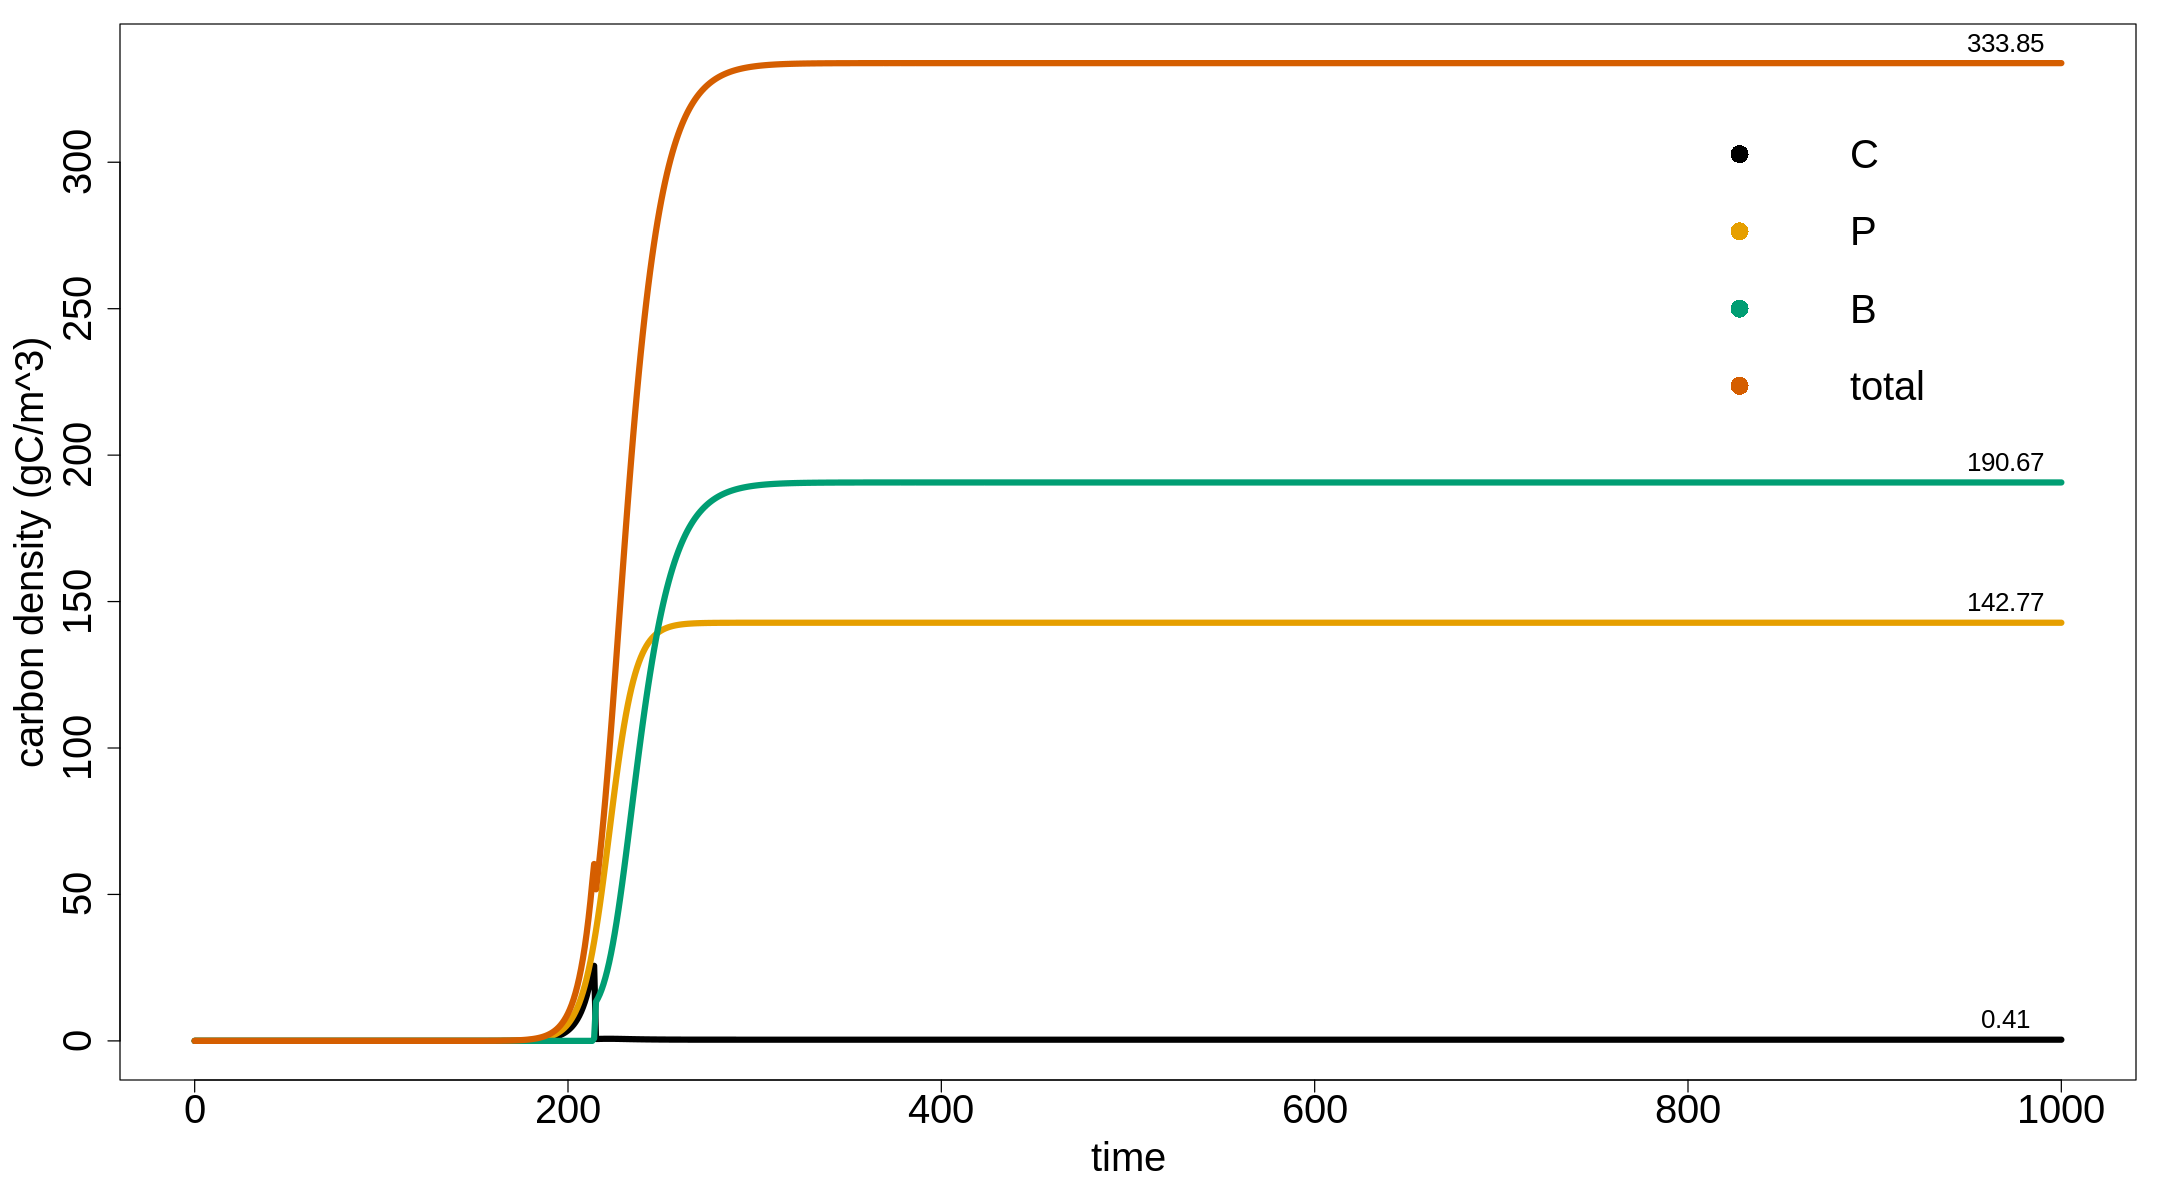

In [7]:
par(mar=c(5, 5, 1, 1), xpd=TRUE, cex = 1) ## c(B,L,T,R)
matplot(rEs[,1], rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=colnames(rEs)[1], ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2)
legend("topright", inset=c(0,.05), legend = colnames(rEs)[-1], pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)
text(x=rep(rEs[nrow(rEs)-30,1],4), y=rEs[nrow(rEs),-1]+7, label=round(rEs[nrow(rEs),-1],2), cex=1.3)

# situations

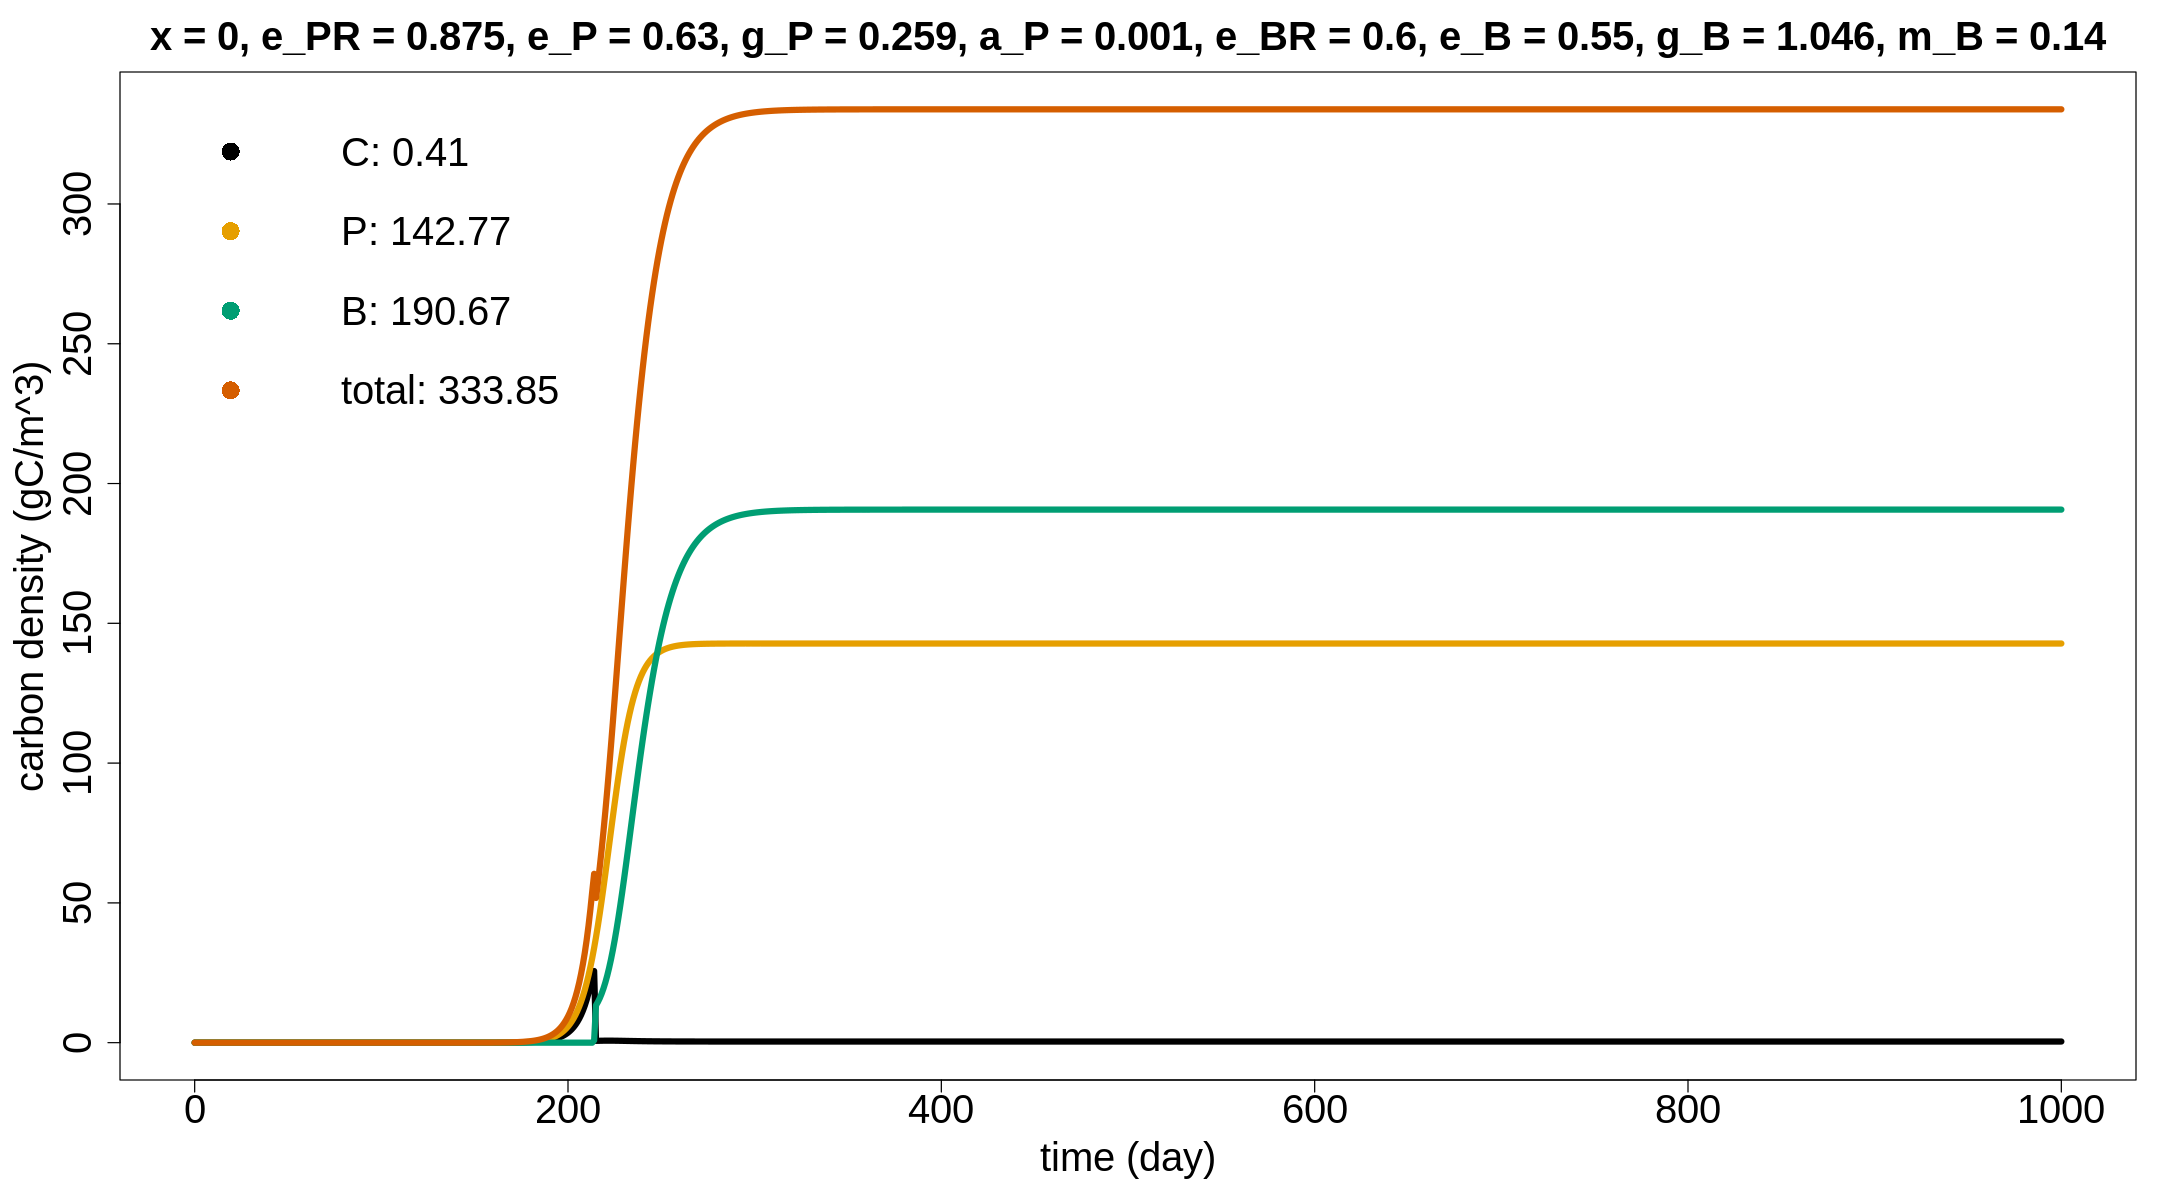

In [8]:
ebcDefault("l","l","l","l")

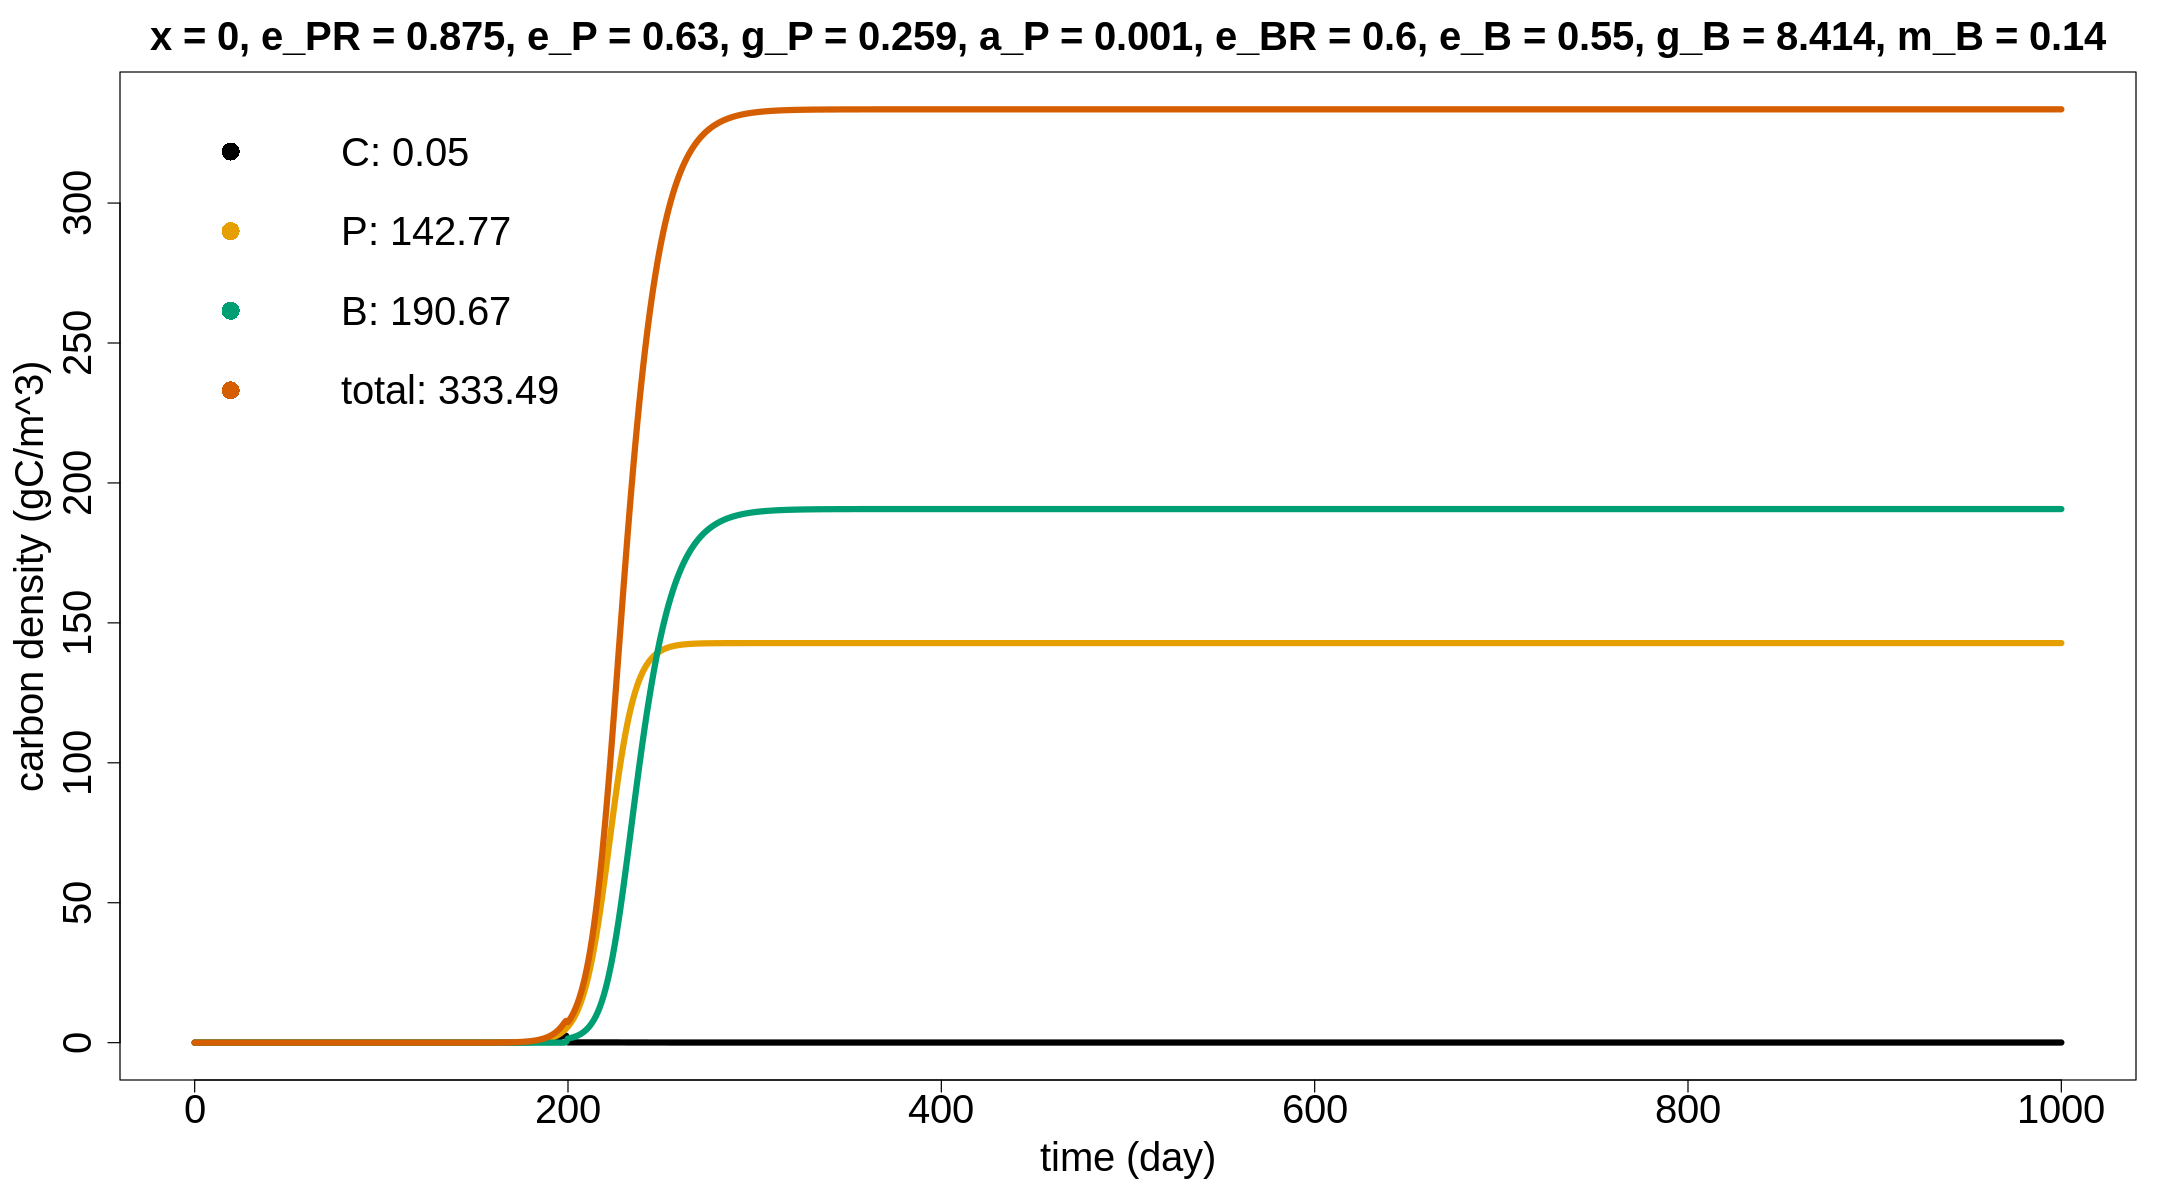

In [9]:
ebcDefault("l","l","l","h")

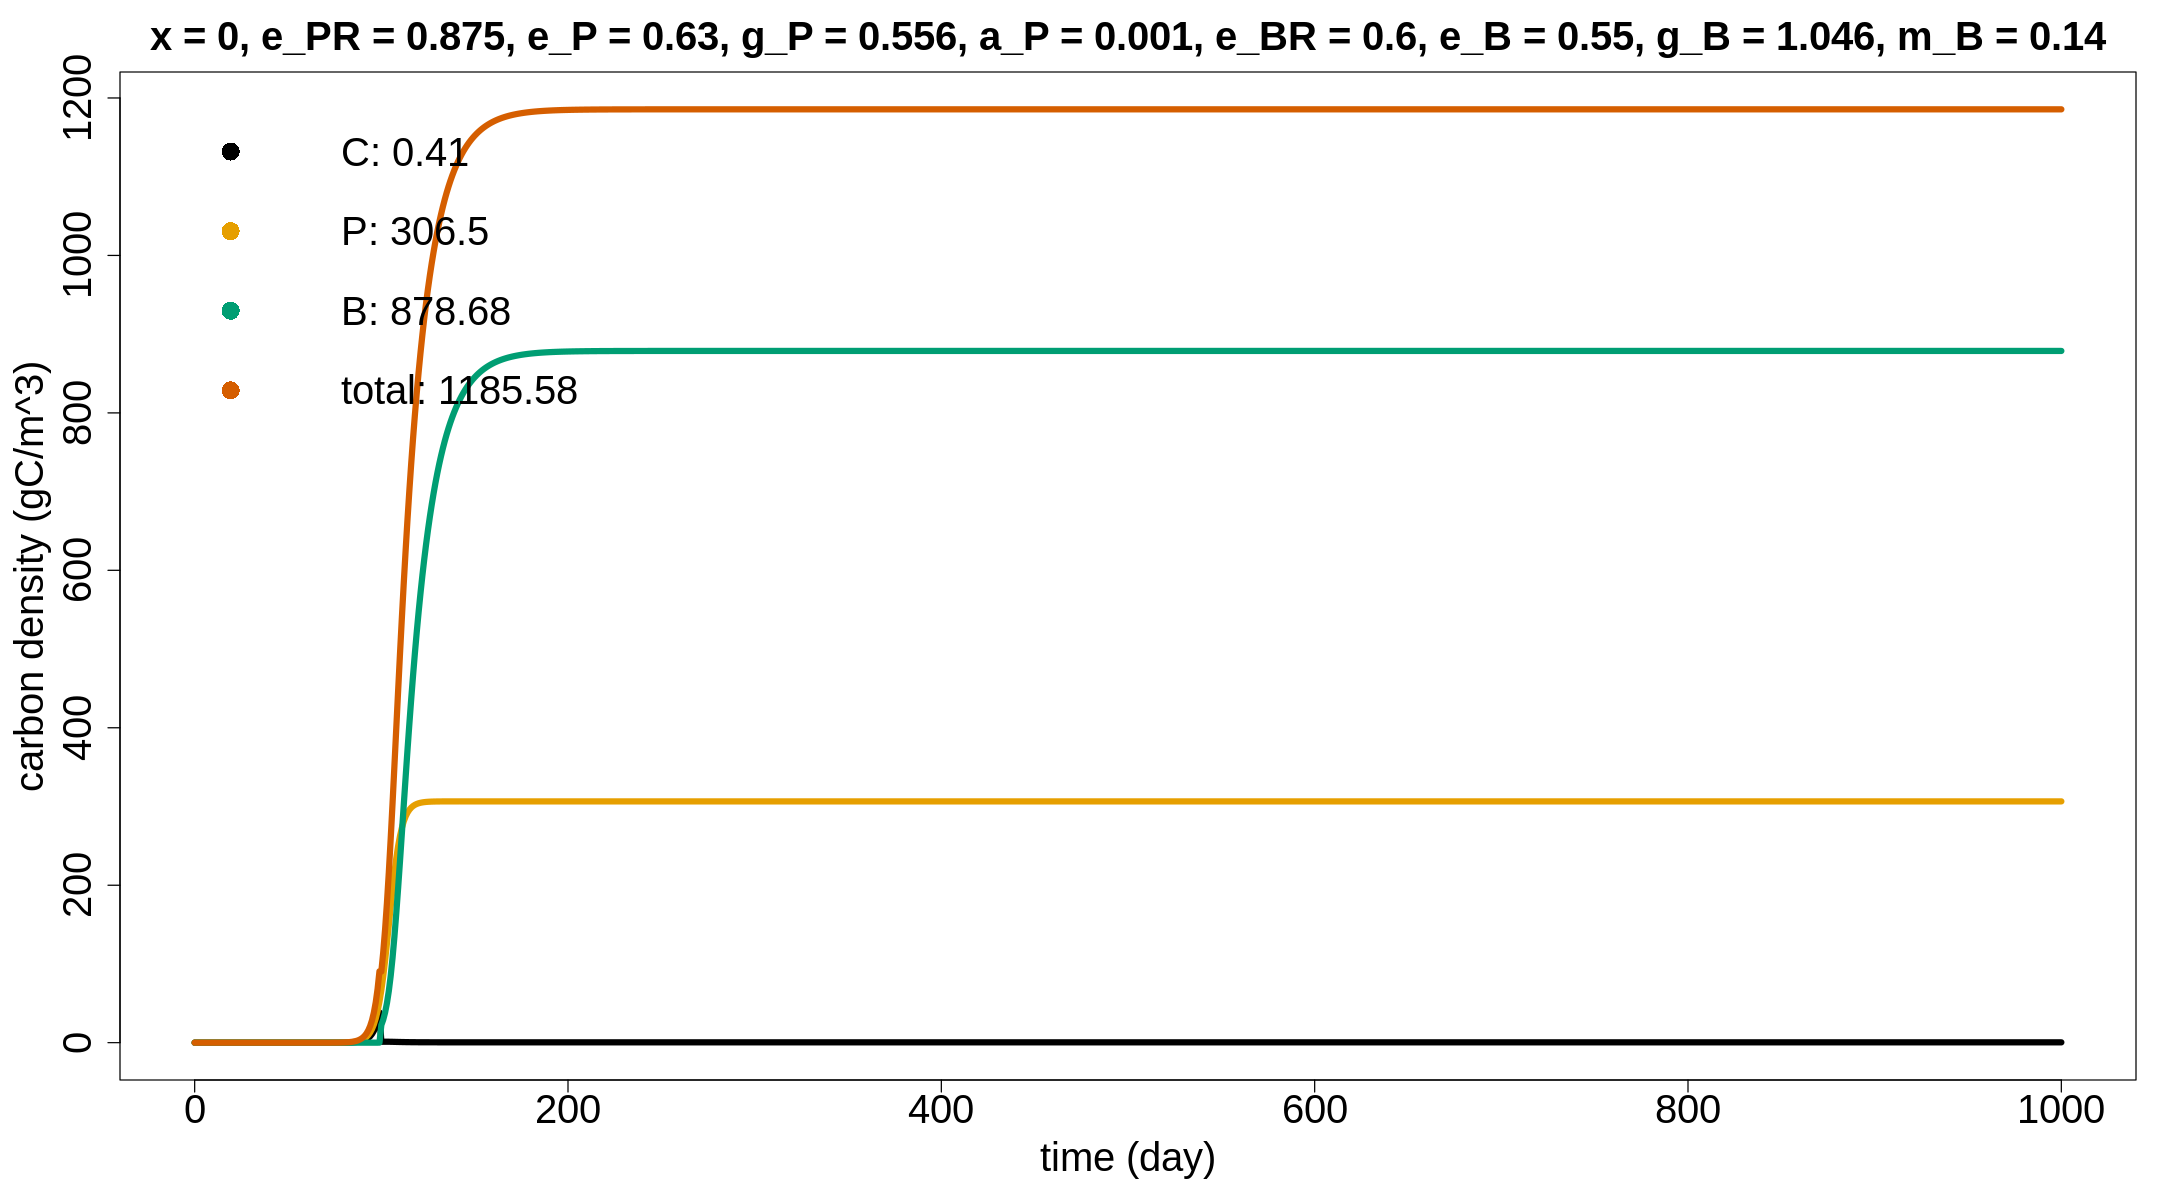

In [10]:
ebcDefault("l","l","h","l")

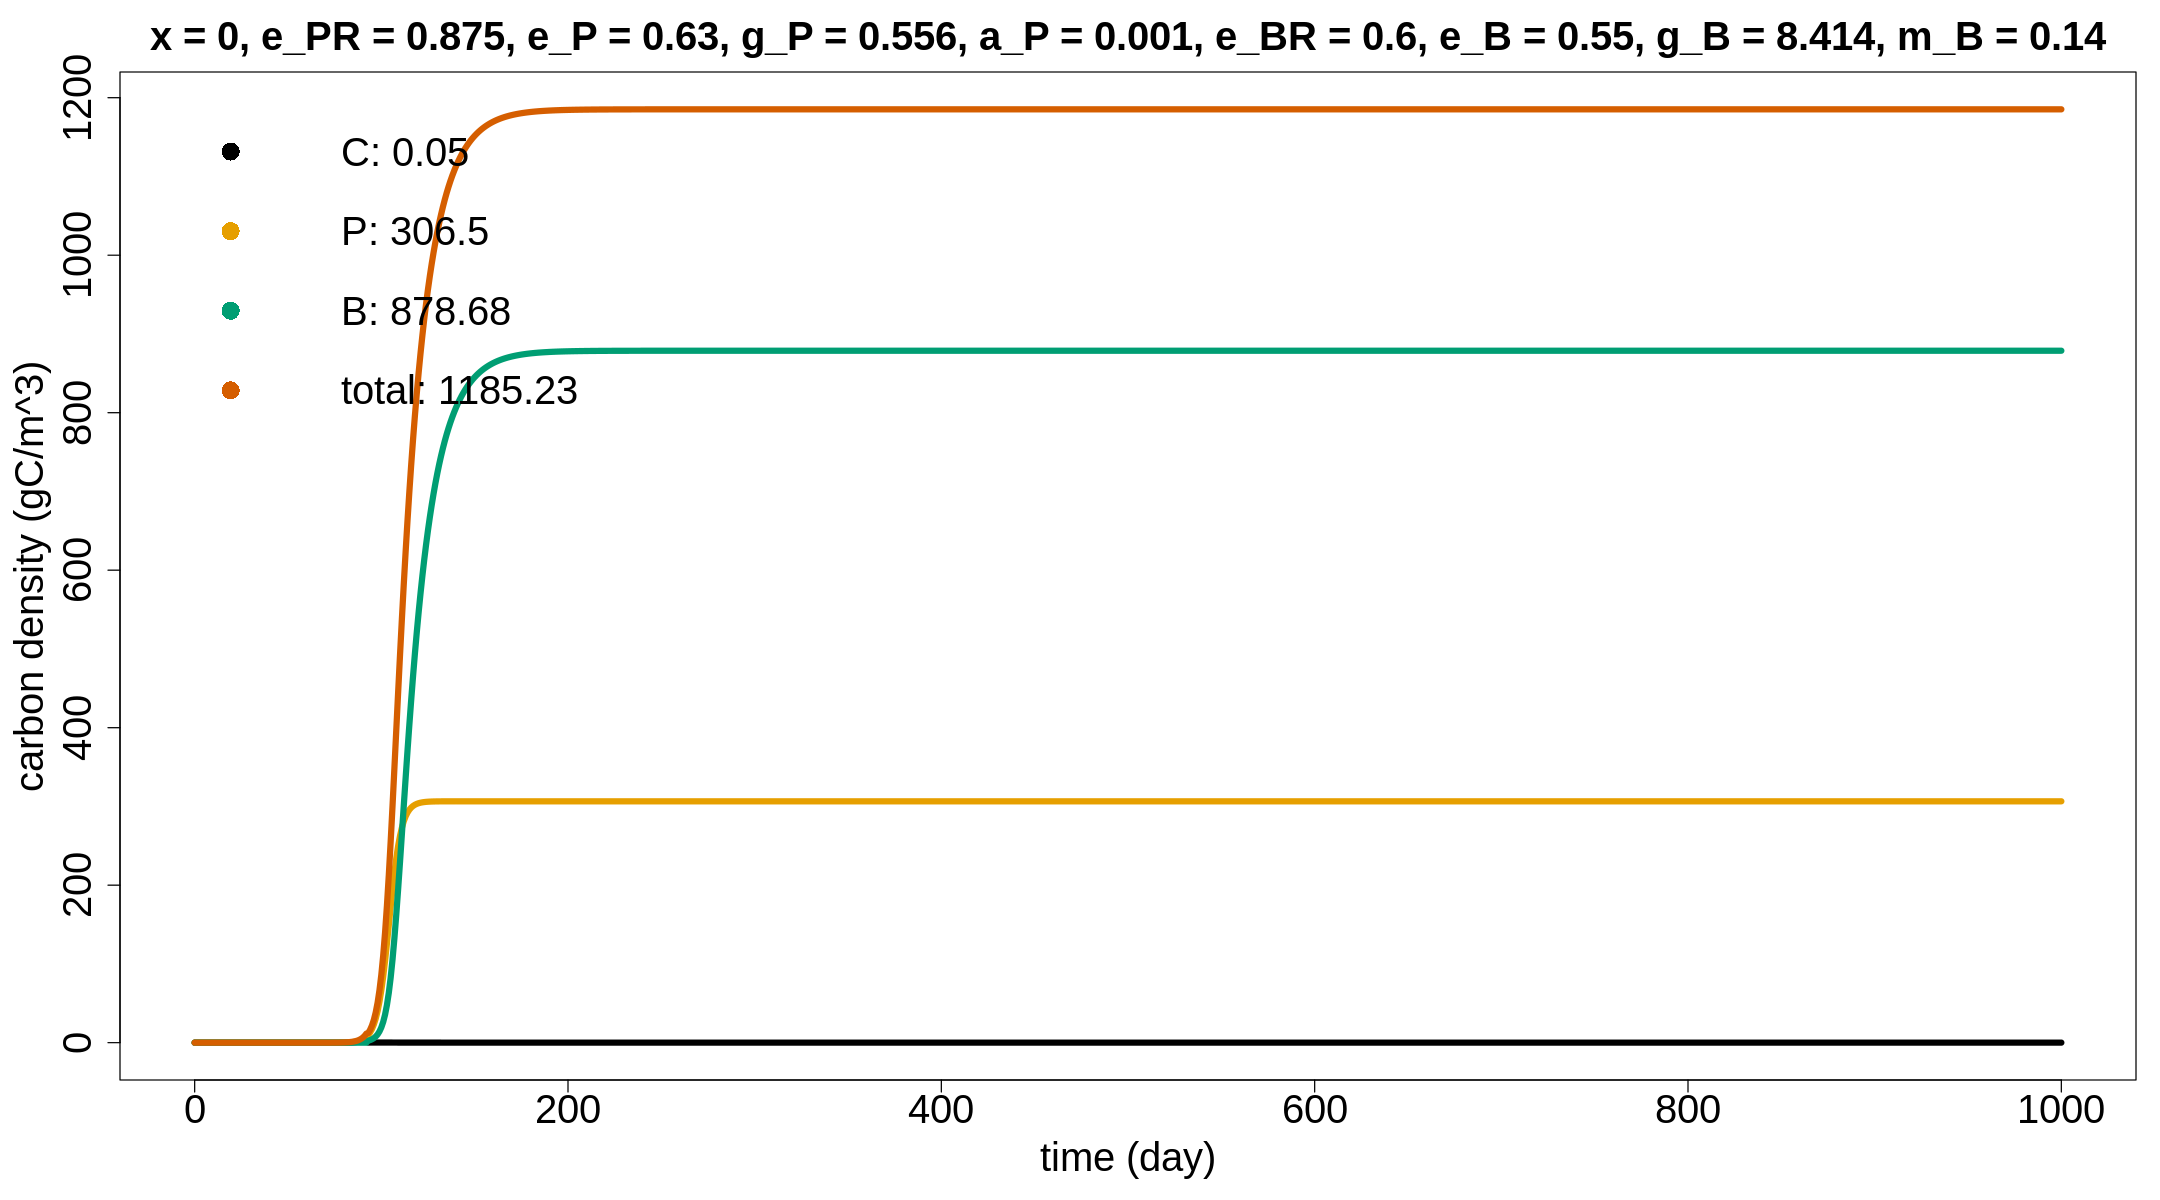

In [11]:
ebcDefault("l","l","h","h")

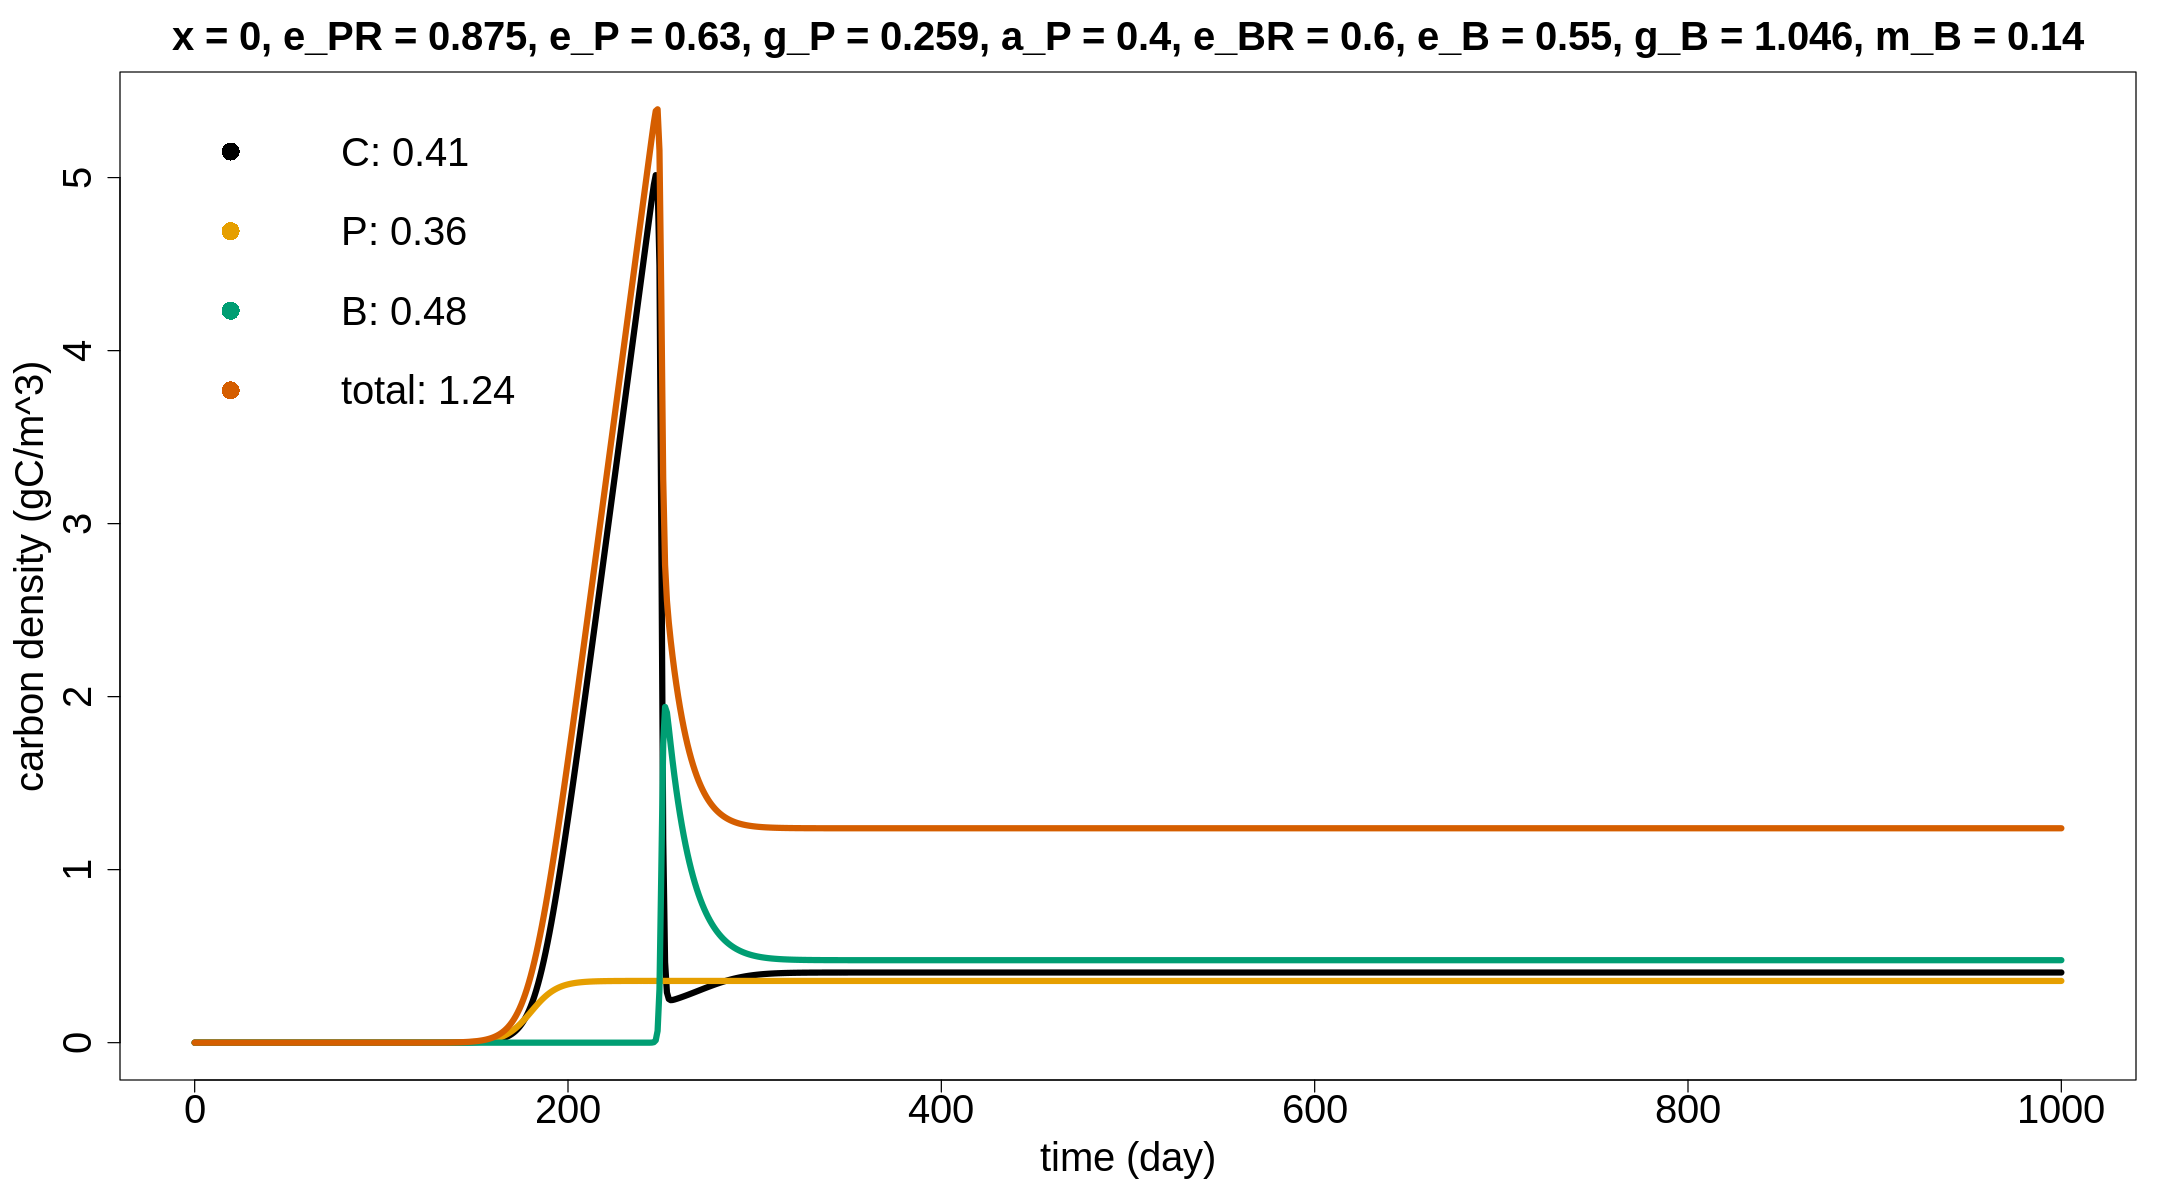

In [12]:
ebcDefault("l","h","l","l")

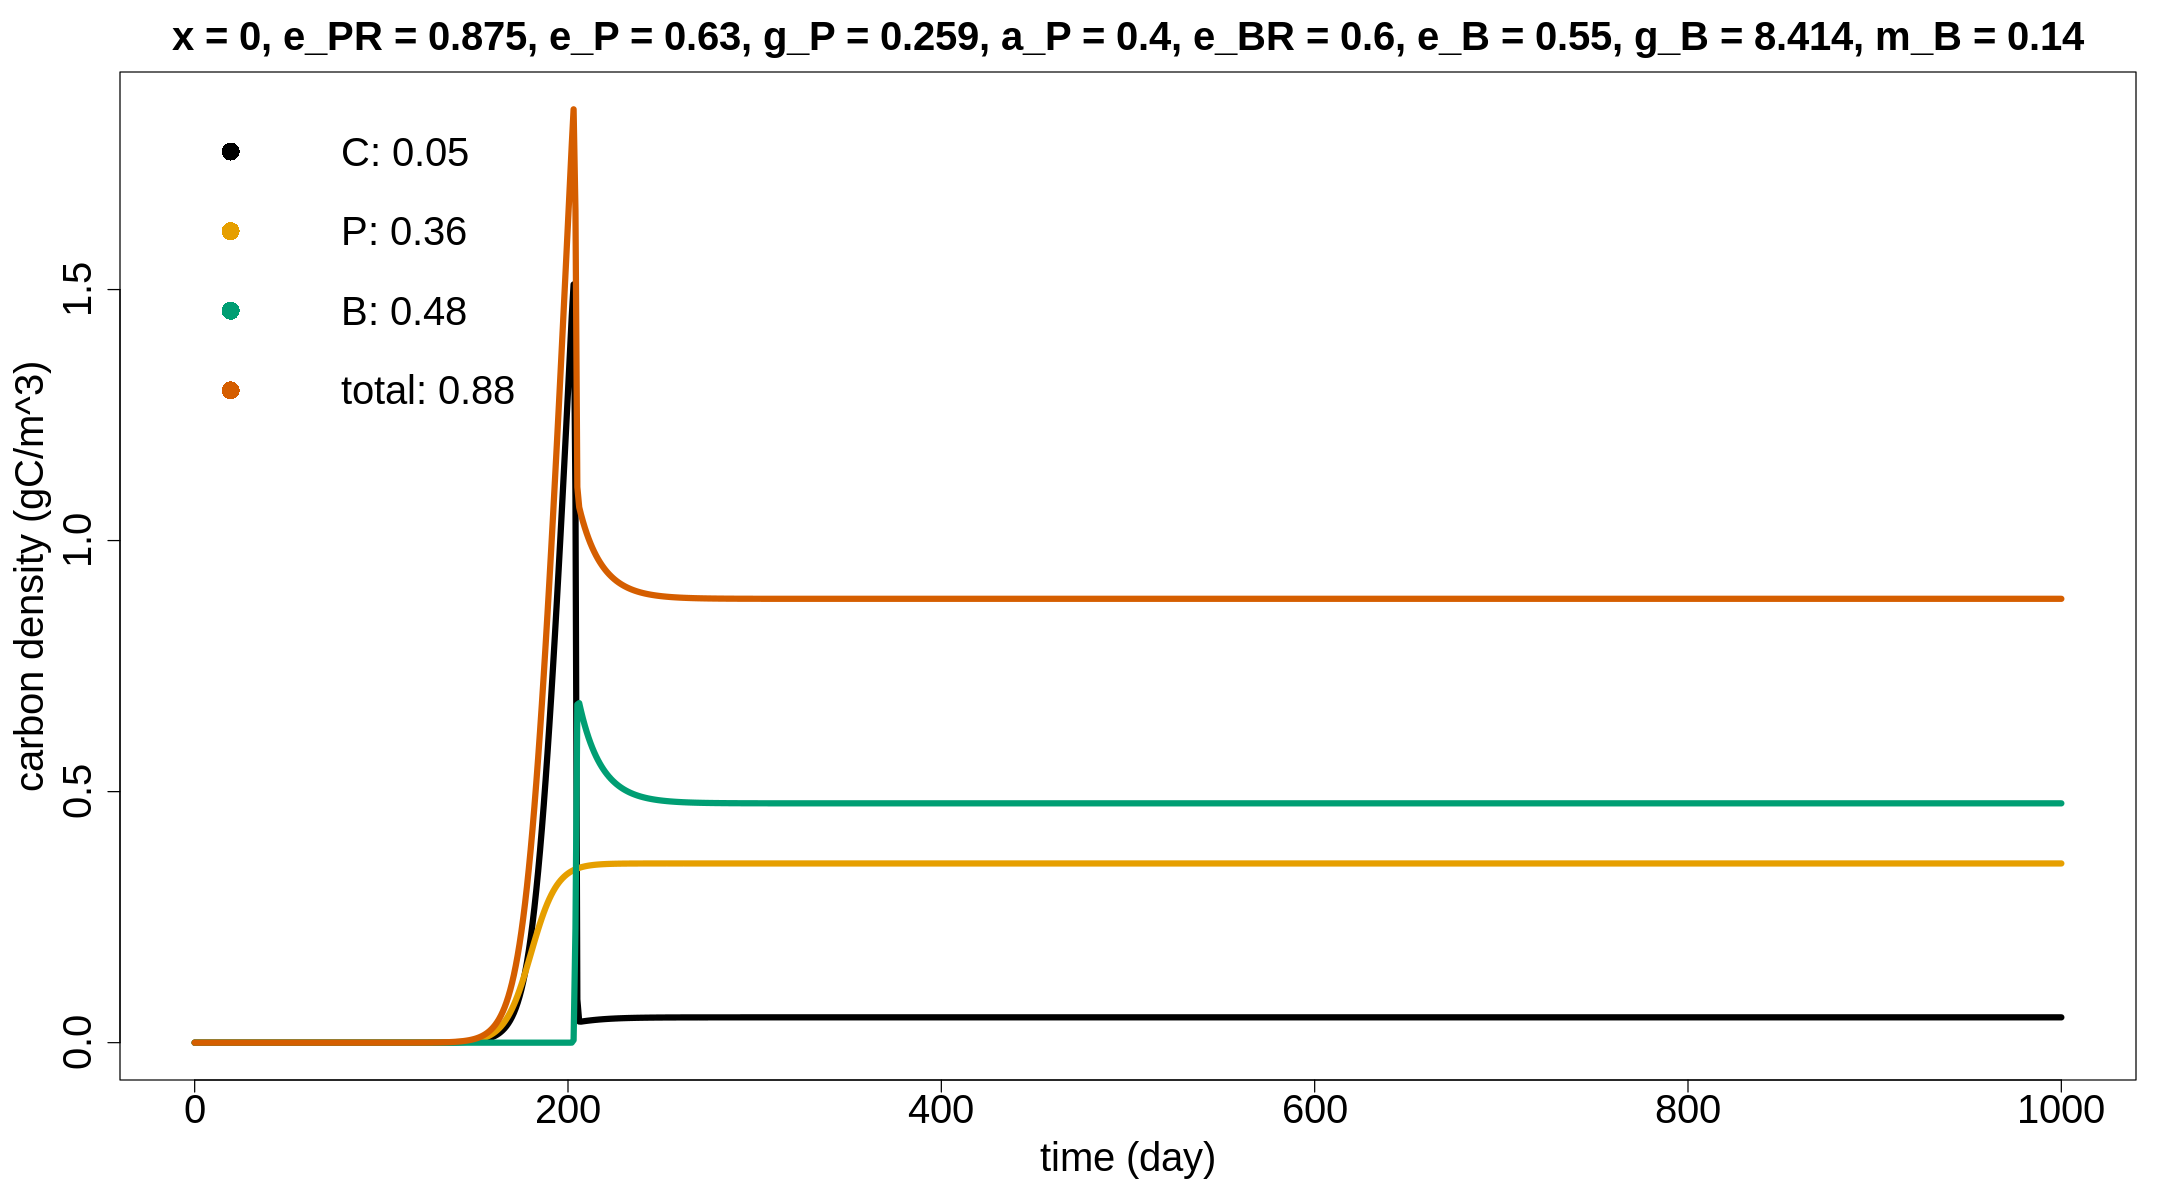

In [13]:
ebcDefault("l","h","l","h")

DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 112.779, R2 = 5.95547e-15
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 112.779, R2 = 5.95547e-15
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 112.779, R2 = 5.95547e-15
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 112.779, R2 = 5.95547e-15
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver wil

Warning message in lsoda(y, times, func, parms, ...):
“an excessive amount of work (> maxsteps ) was done, but integration was not successful - increase maxsteps”
Warning message in lsoda(y, times, func, parms, ...):
“Returning early. Results are accurate, as far as they go”


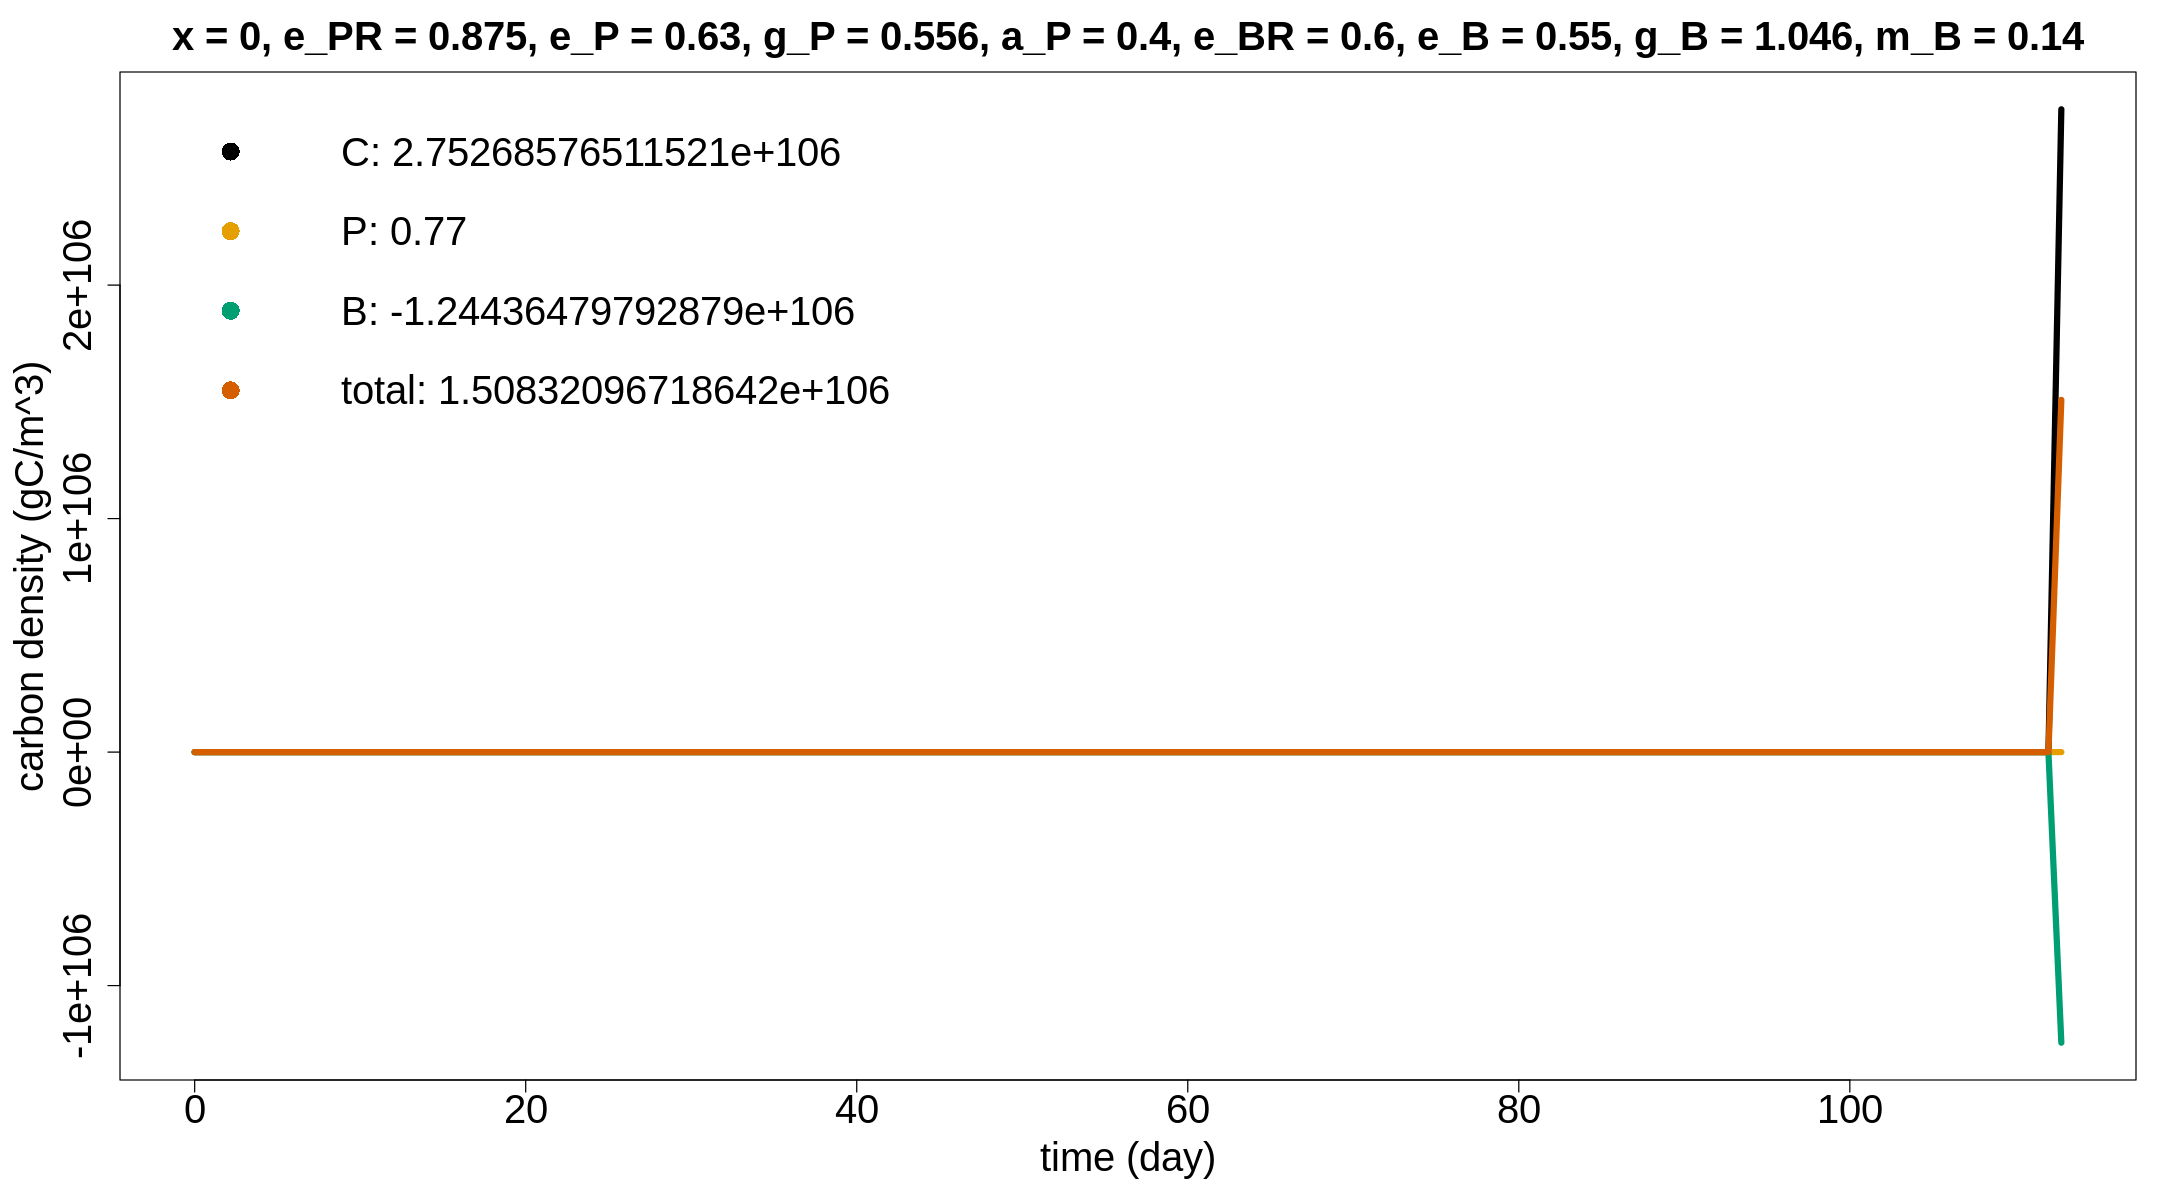

In [14]:
ebcDefault("l","h","h","l")

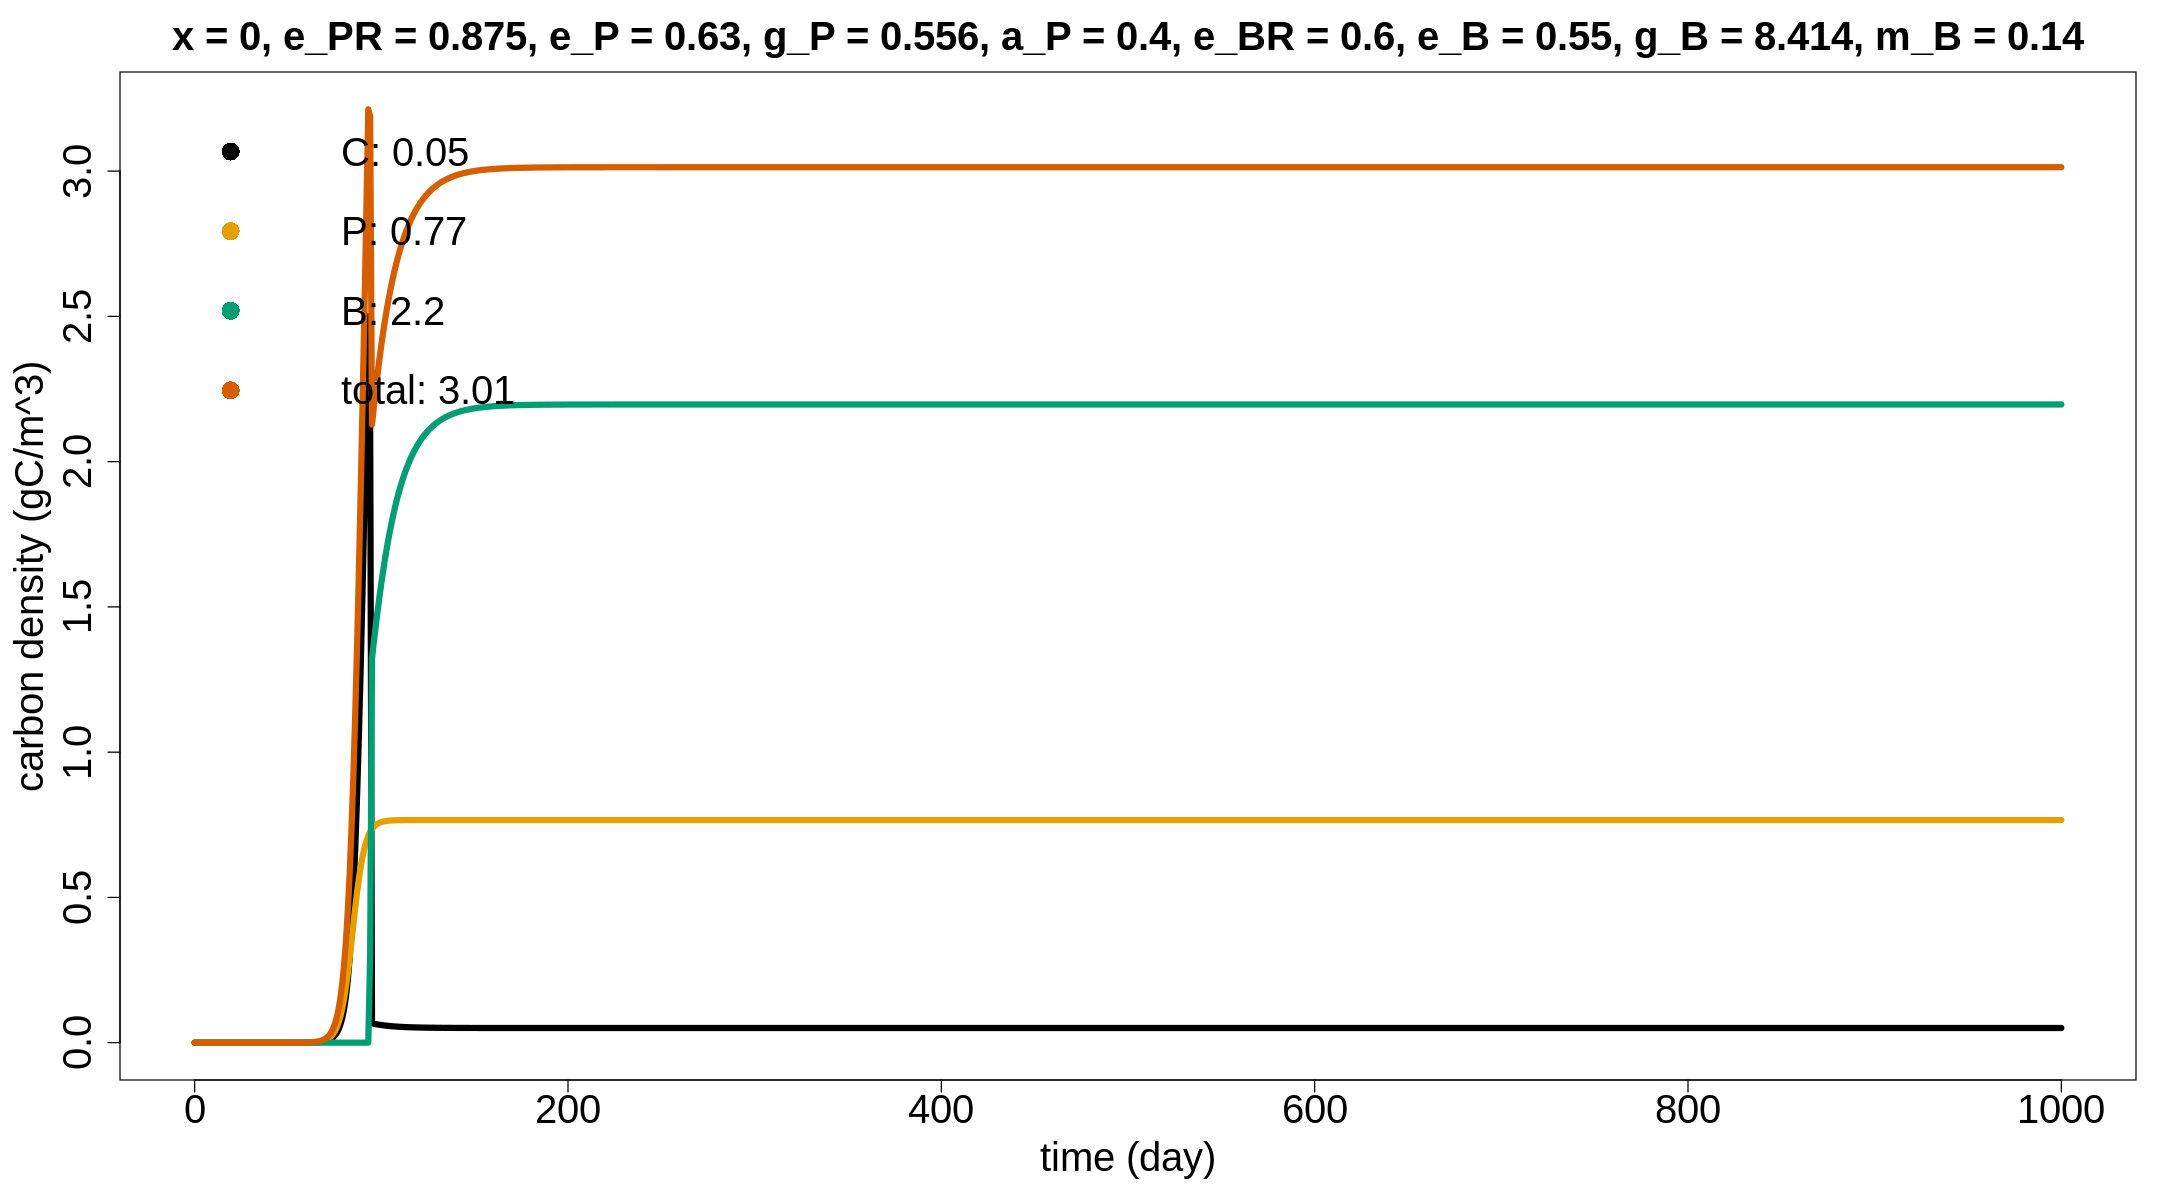

In [15]:
ebcDefault("l","h","h","h")

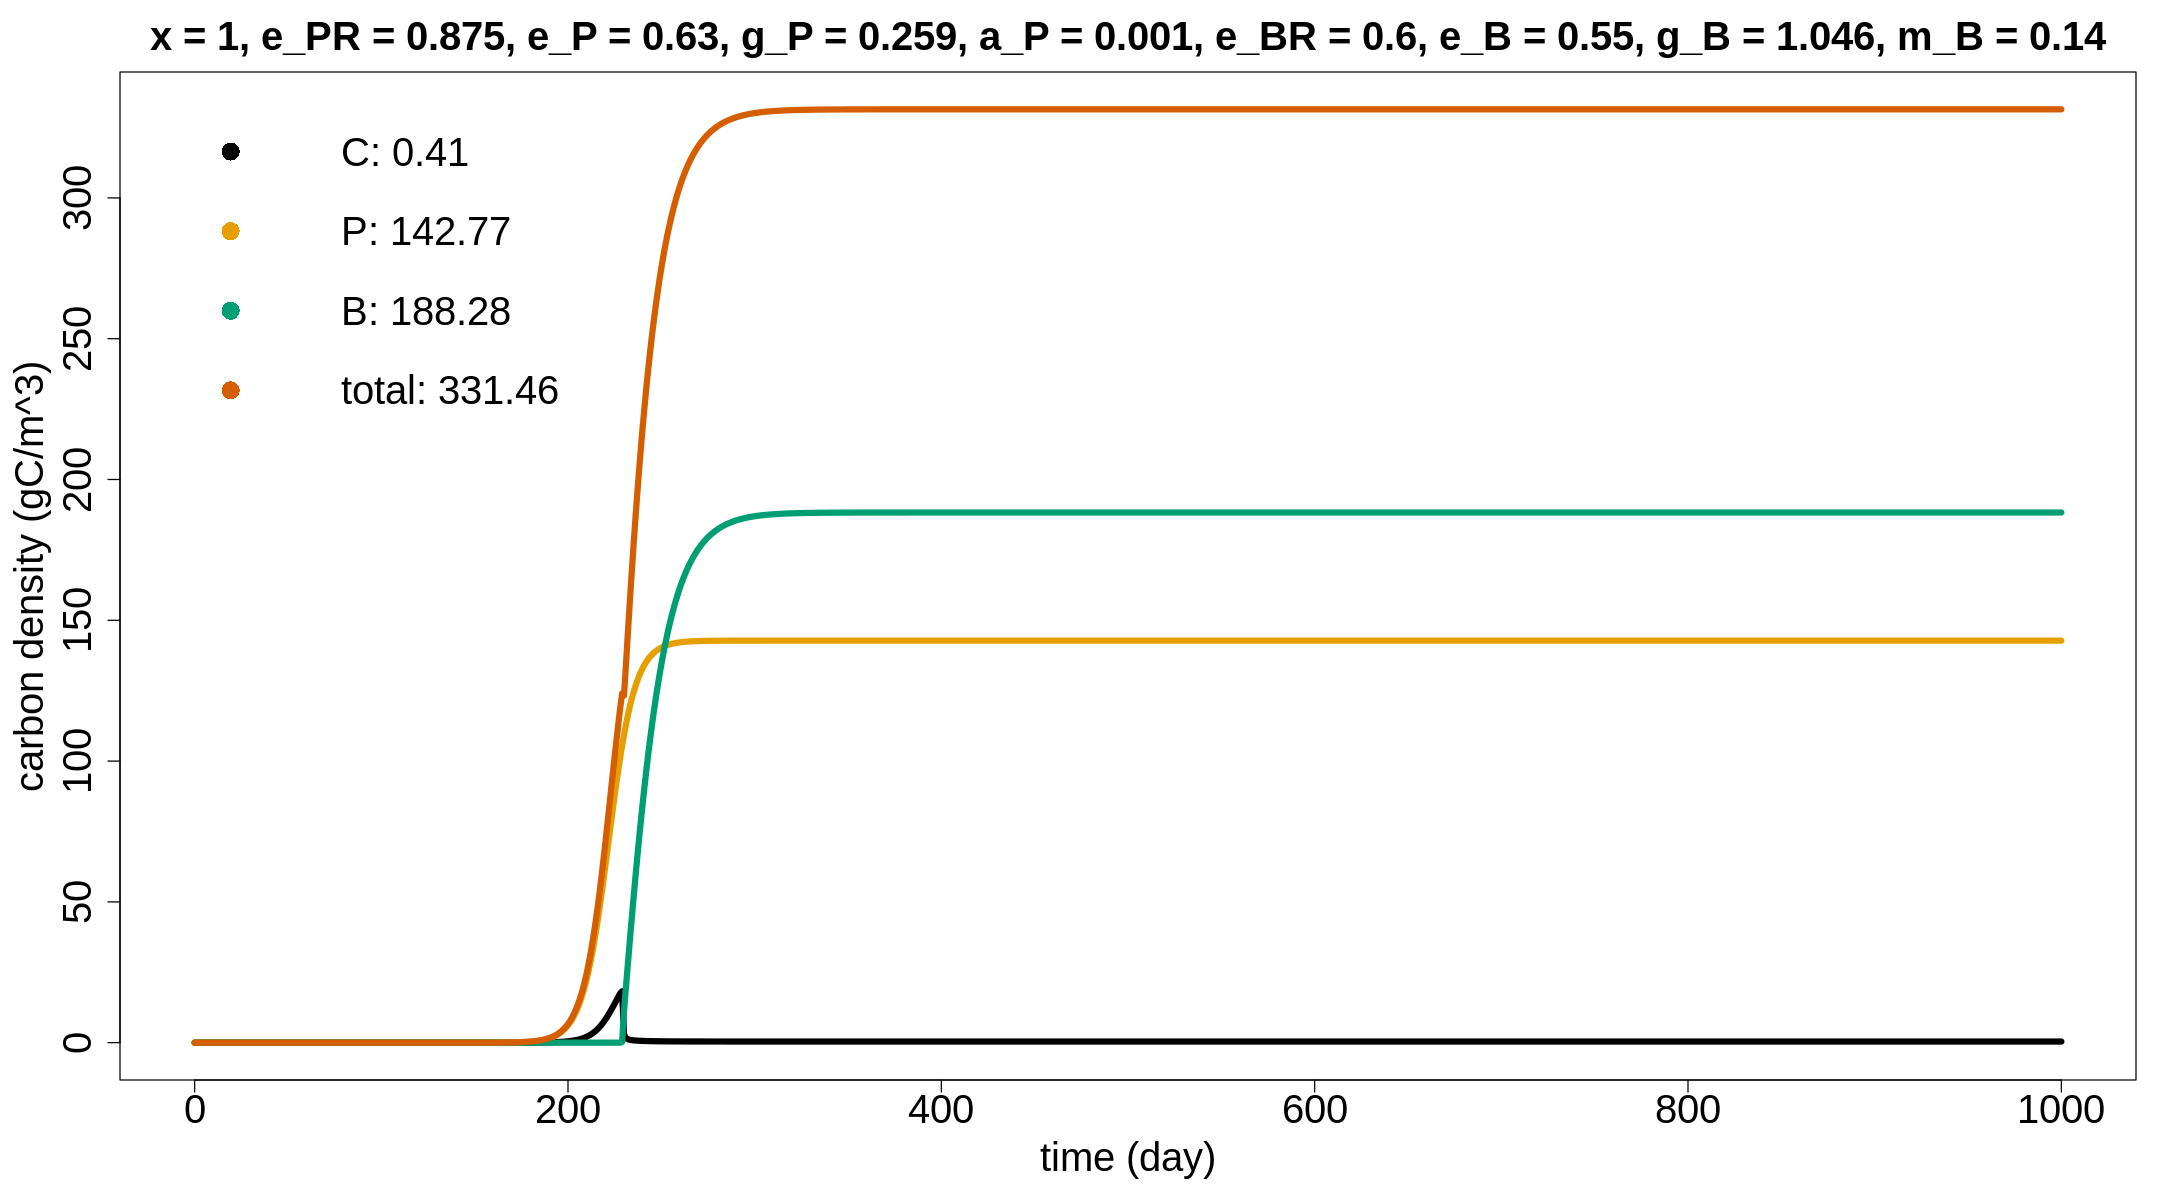

In [16]:
ebcDefault("h","l","l","l")

DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 214.322, R2 = 1.26525e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 214.322, R2 = 1.26525e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 214.322, R2 = 1.26525e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 214.322, R2 = 1.26525e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver wil

Warning message in lsoda(y, times, func, parms, ...):
“an excessive amount of work (> maxsteps ) was done, but integration was not successful - increase maxsteps”
Warning message in lsoda(y, times, func, parms, ...):
“Returning early. Results are accurate, as far as they go”


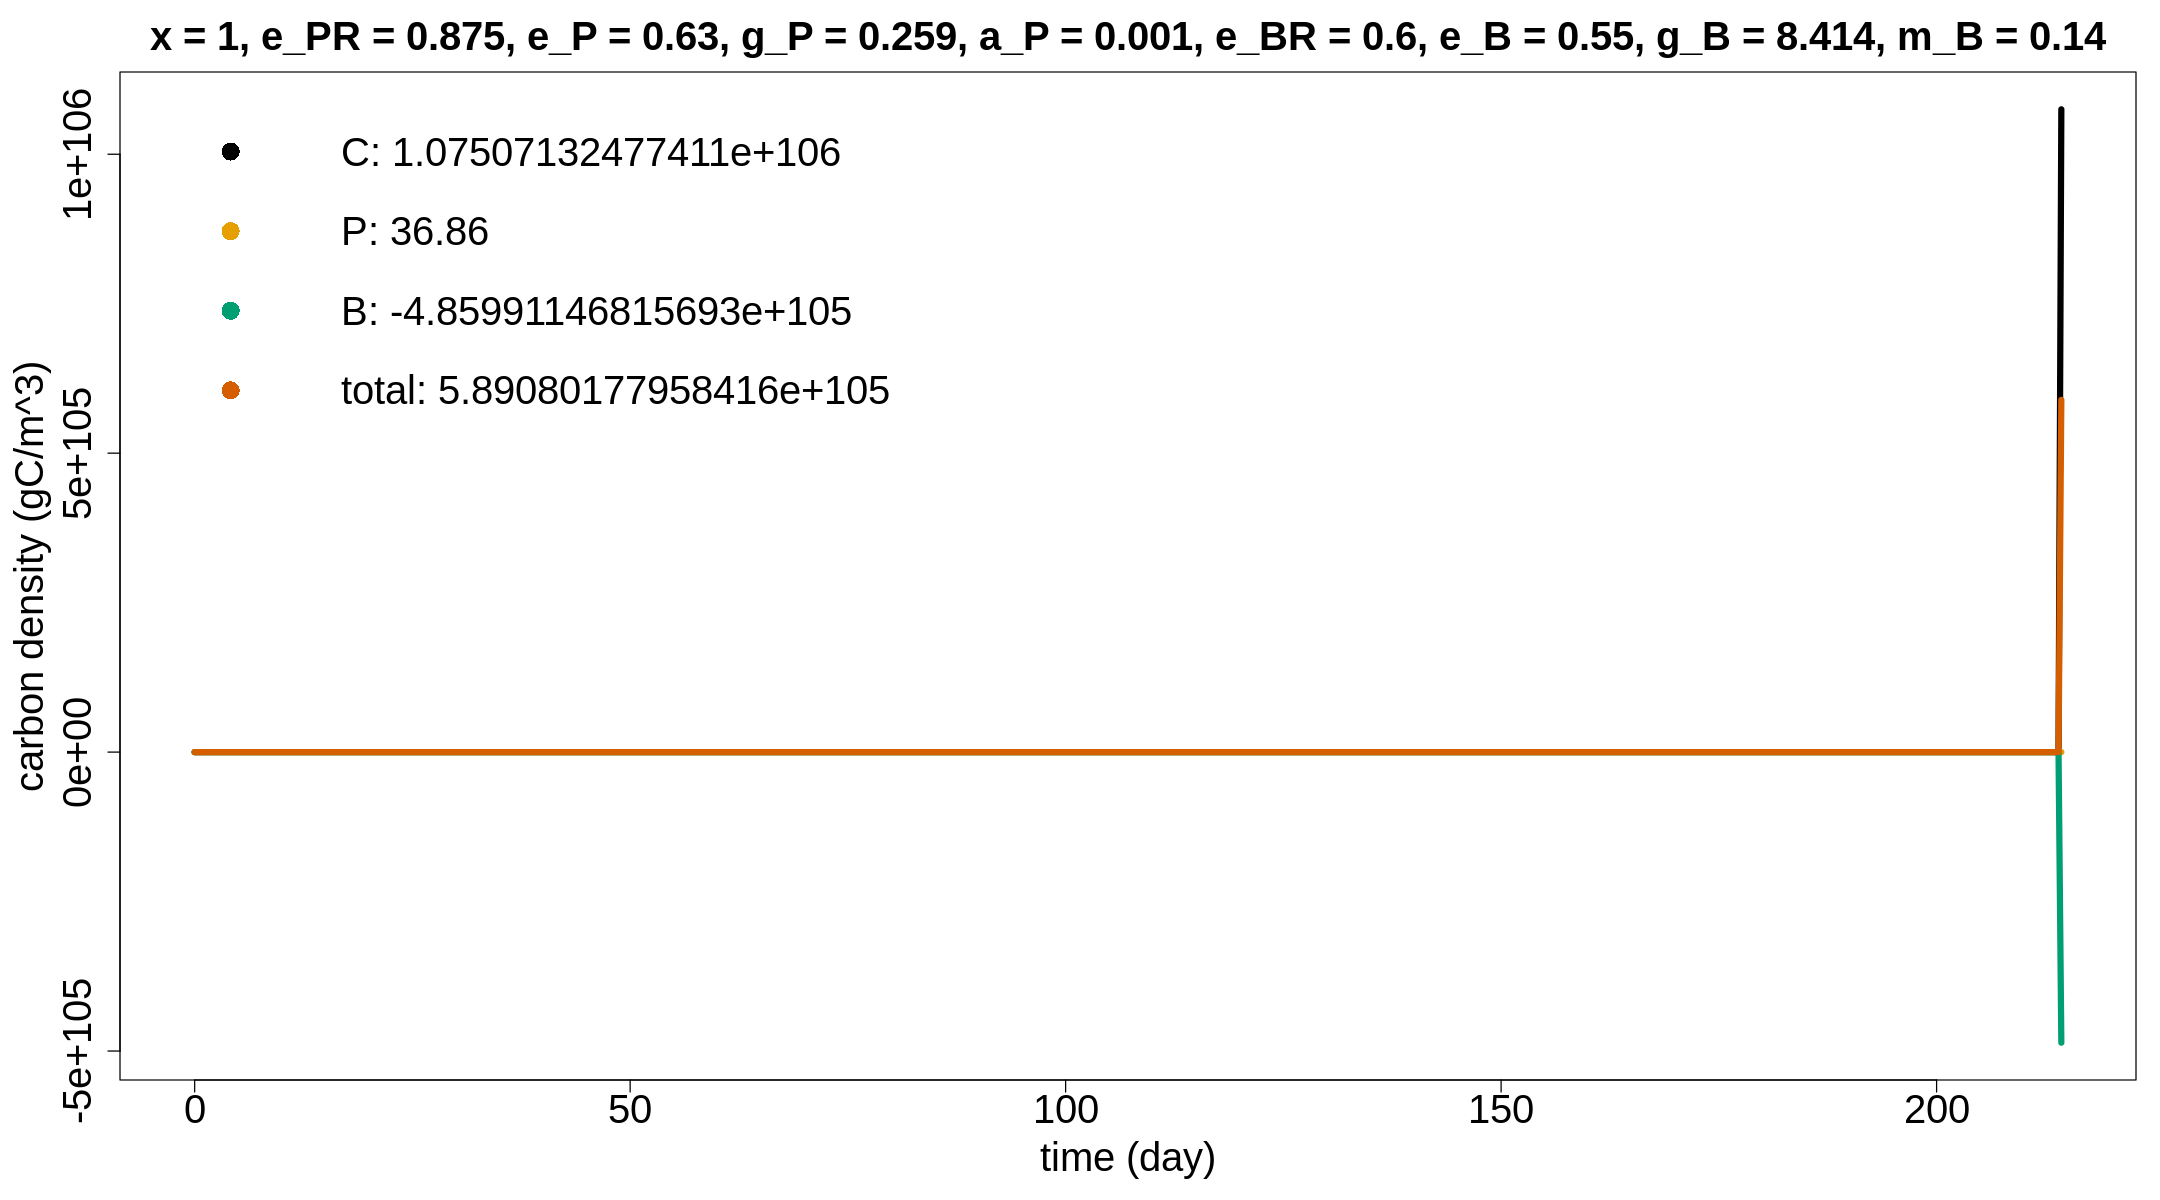

In [17]:
ebcDefault("h","l","l","h")

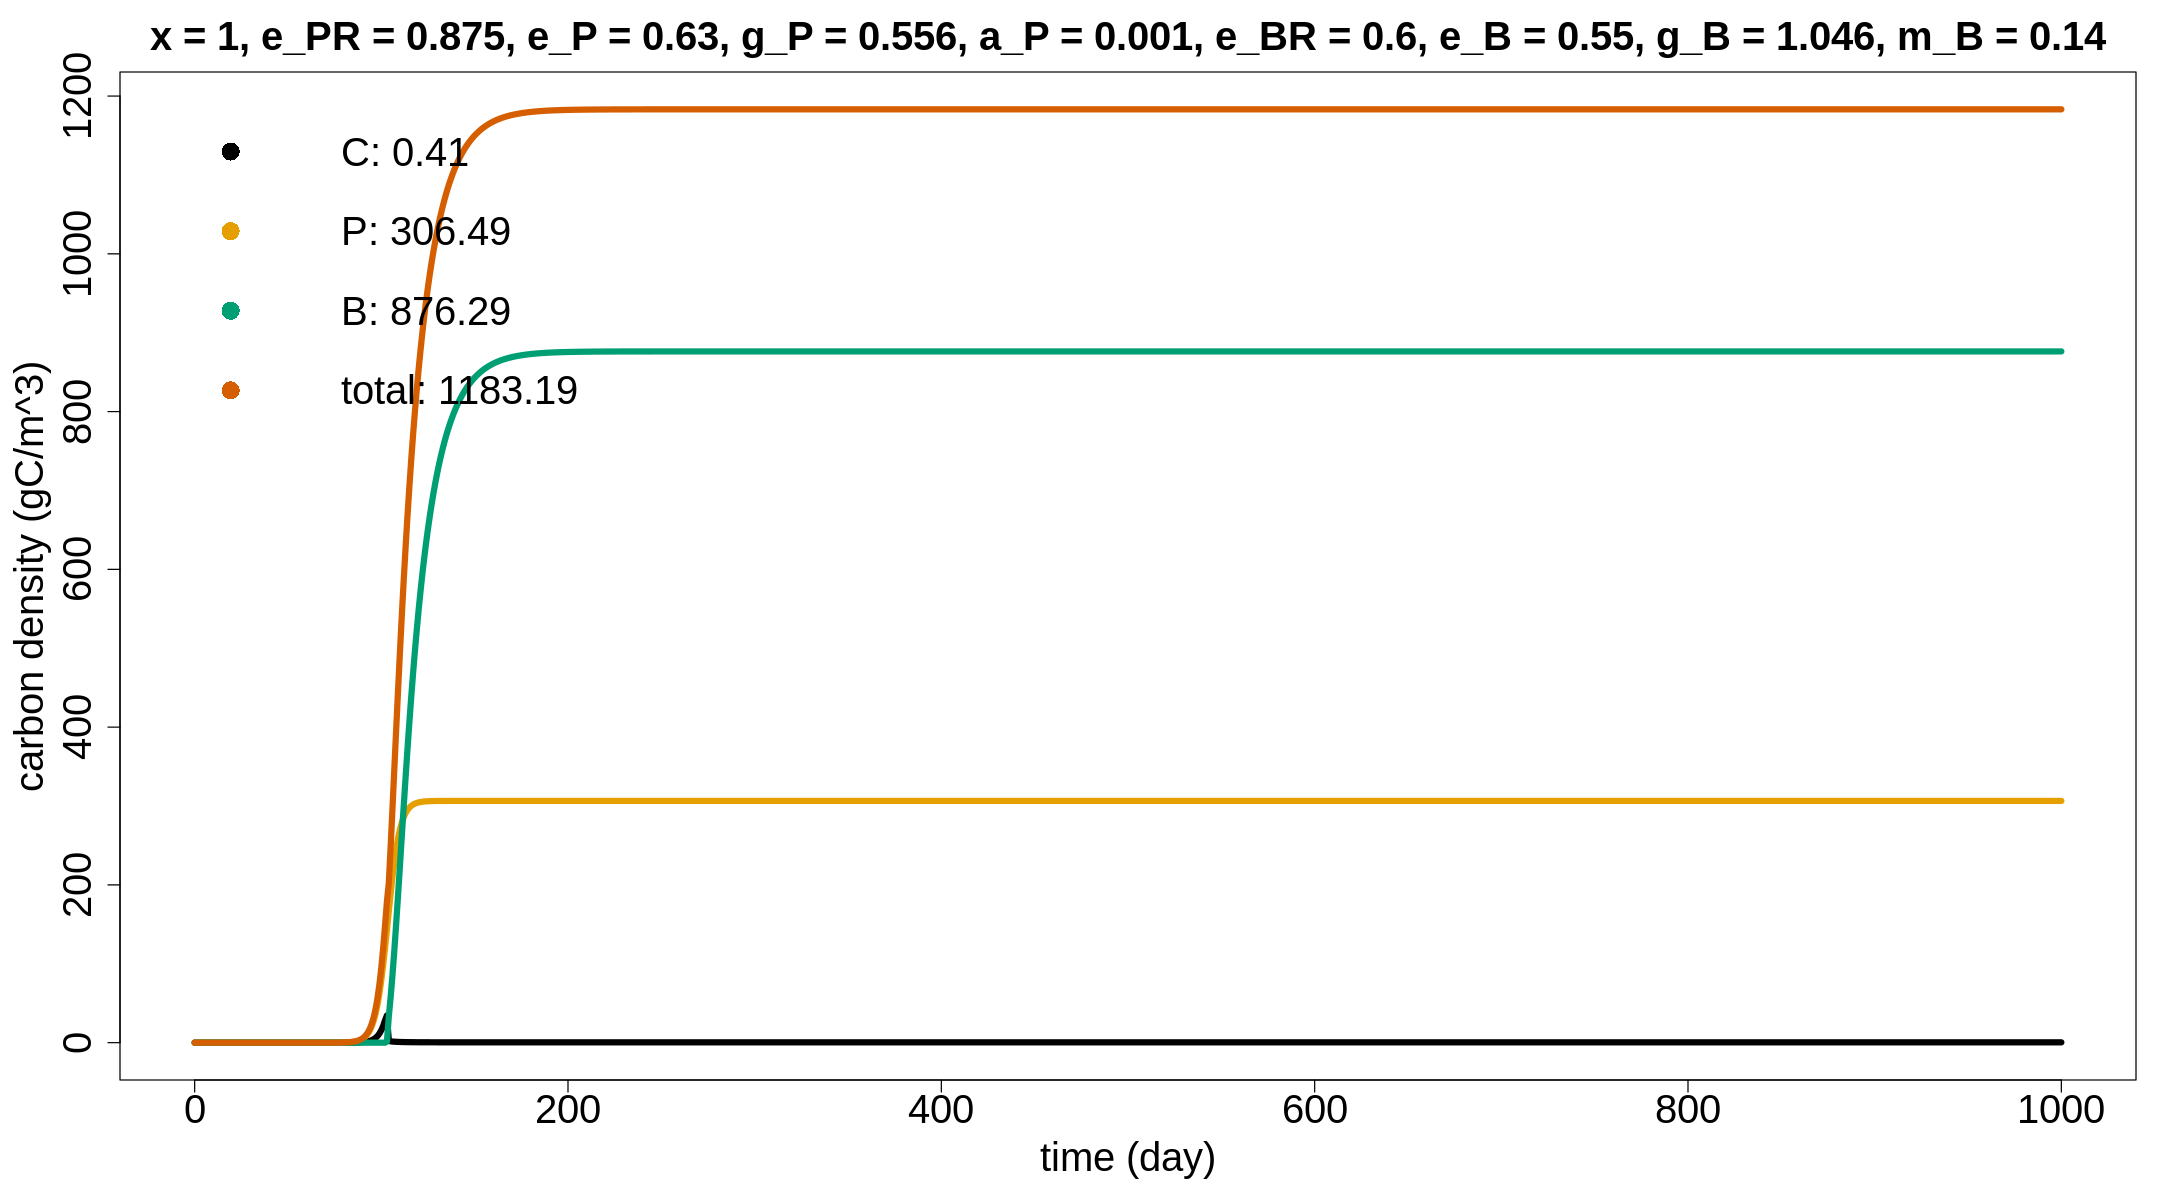

In [18]:
ebcDefault("h","l","h","l")

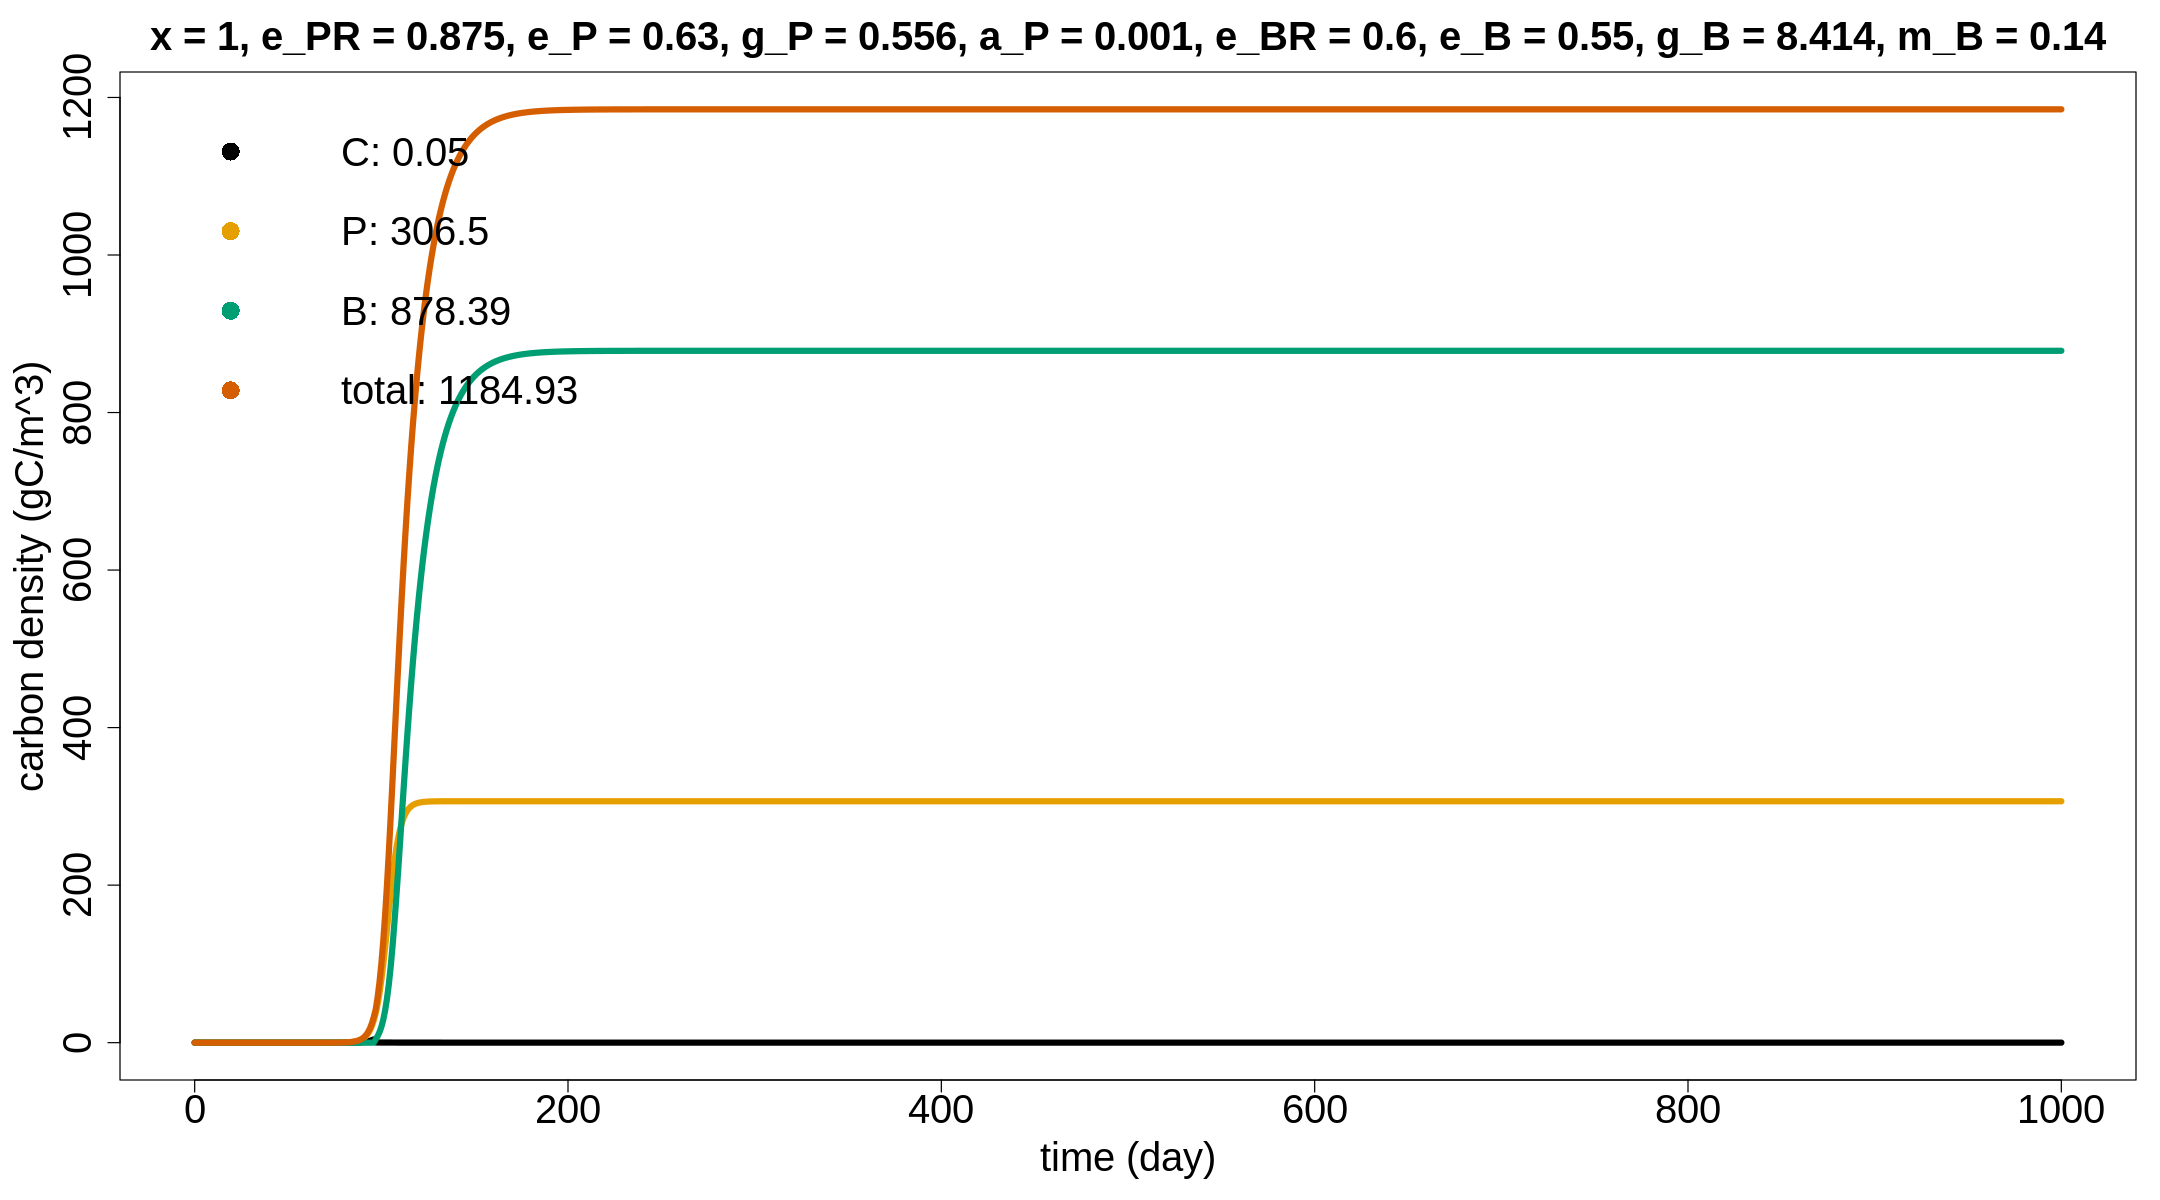

In [19]:
ebcDefault("h","l","h","h")

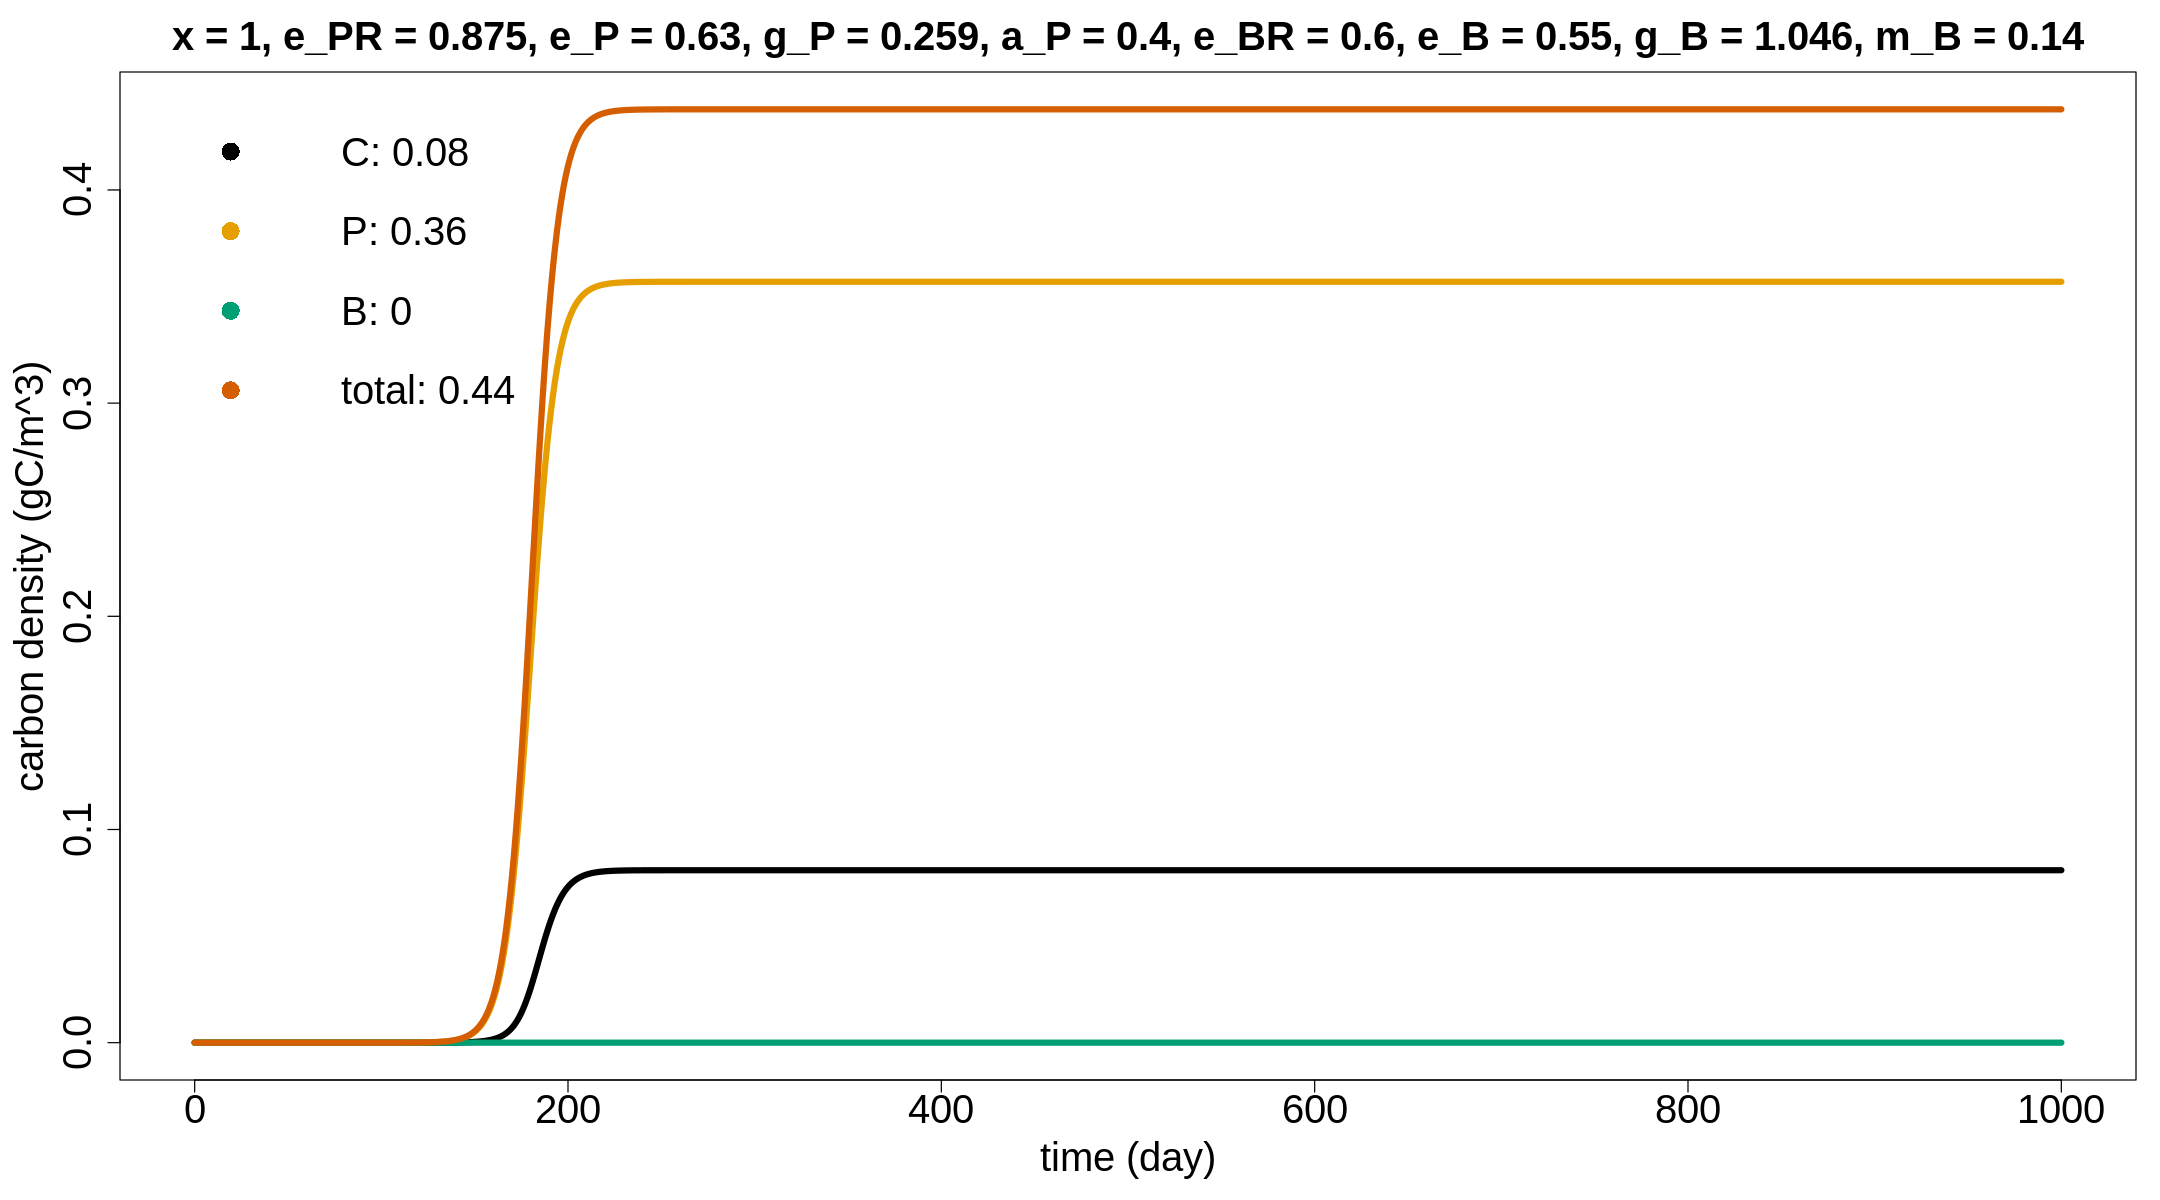

In [20]:
ebcDefault("h","h","l","l")

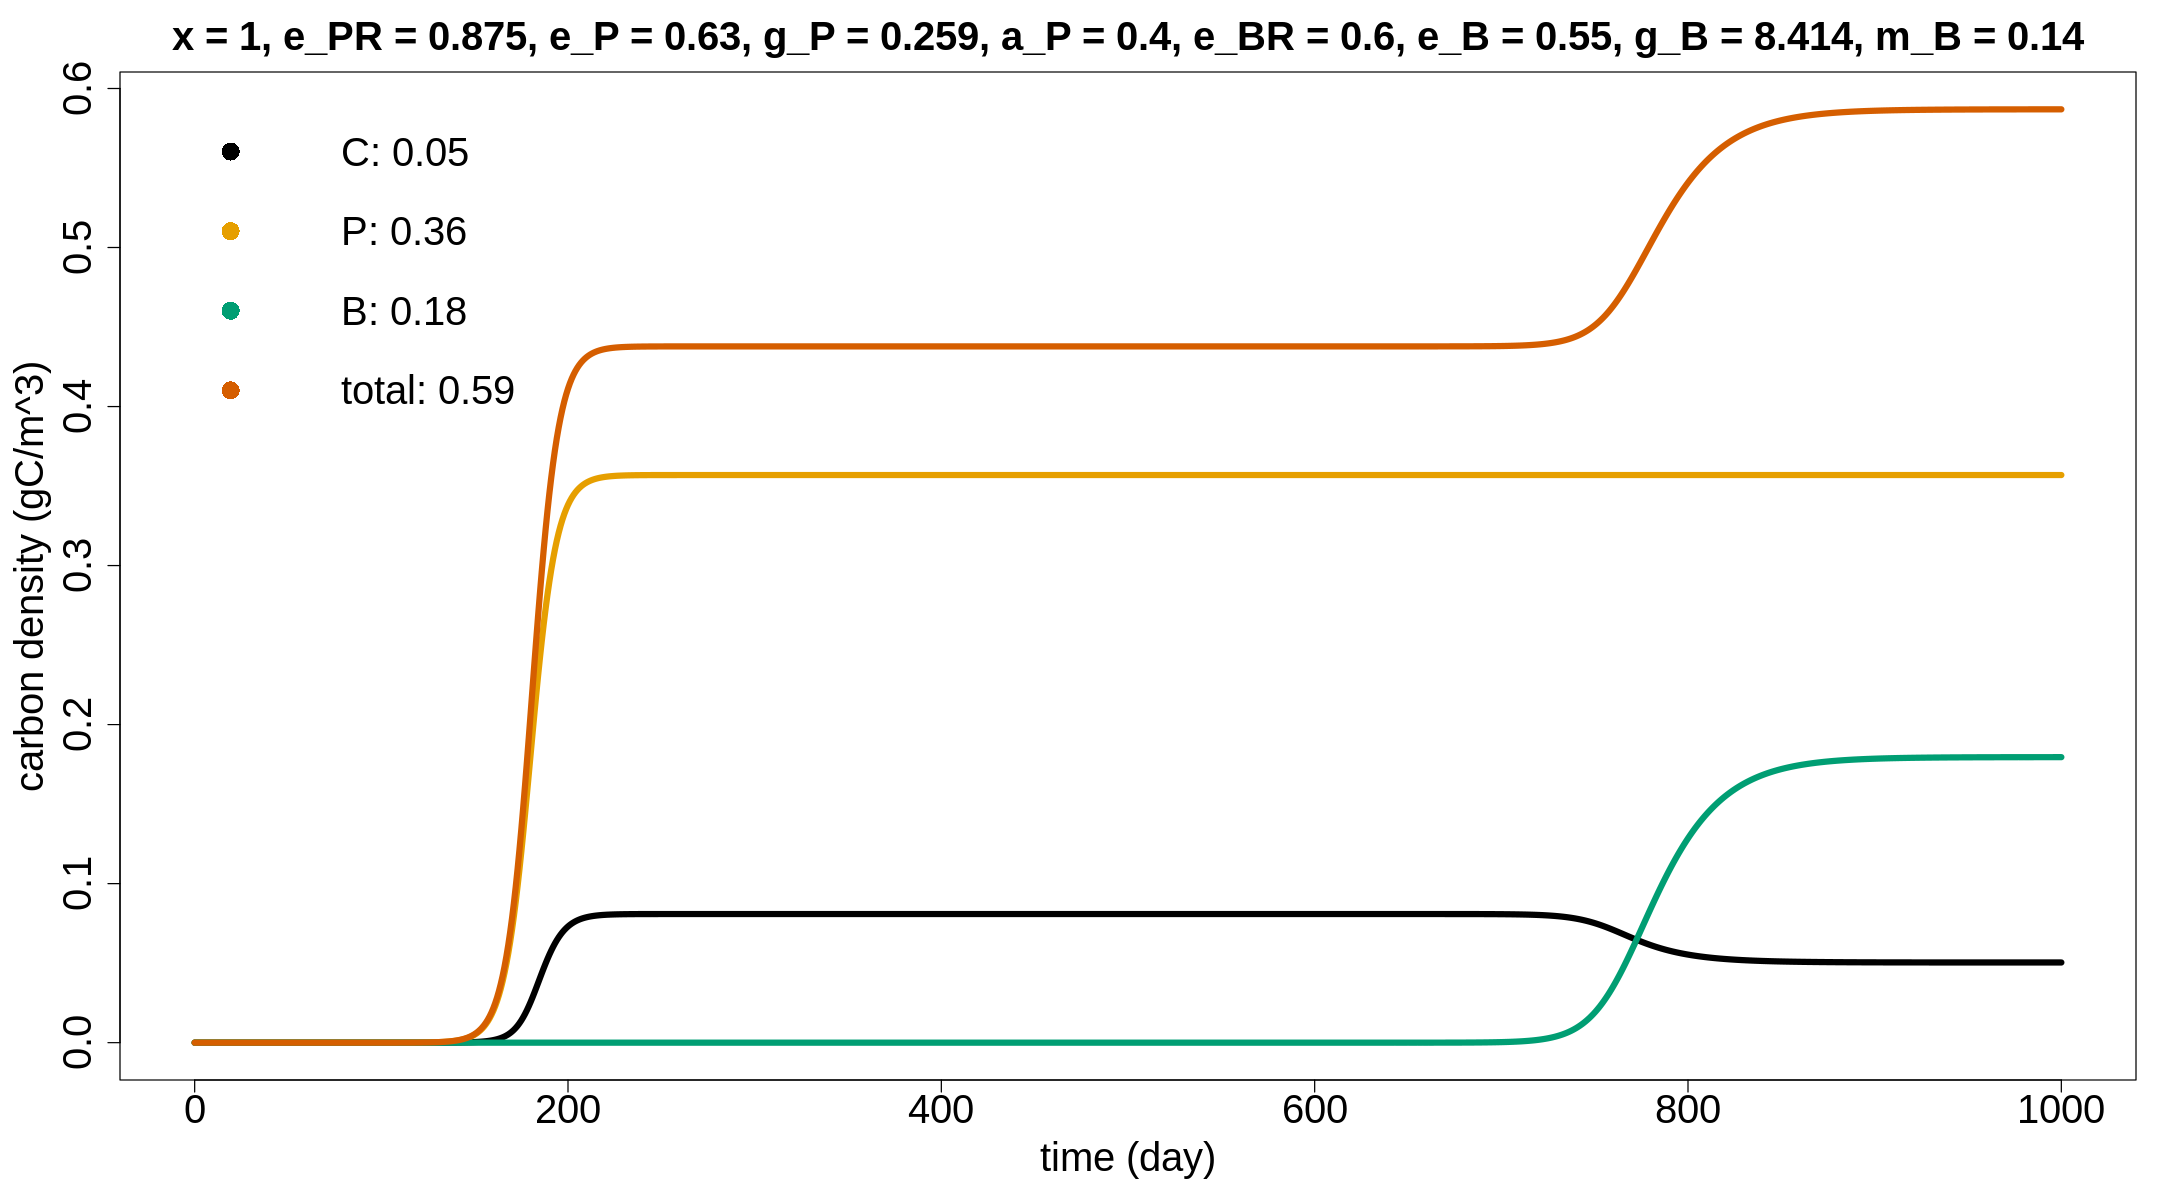

In [21]:
ebcDefault("h","h","l","h")

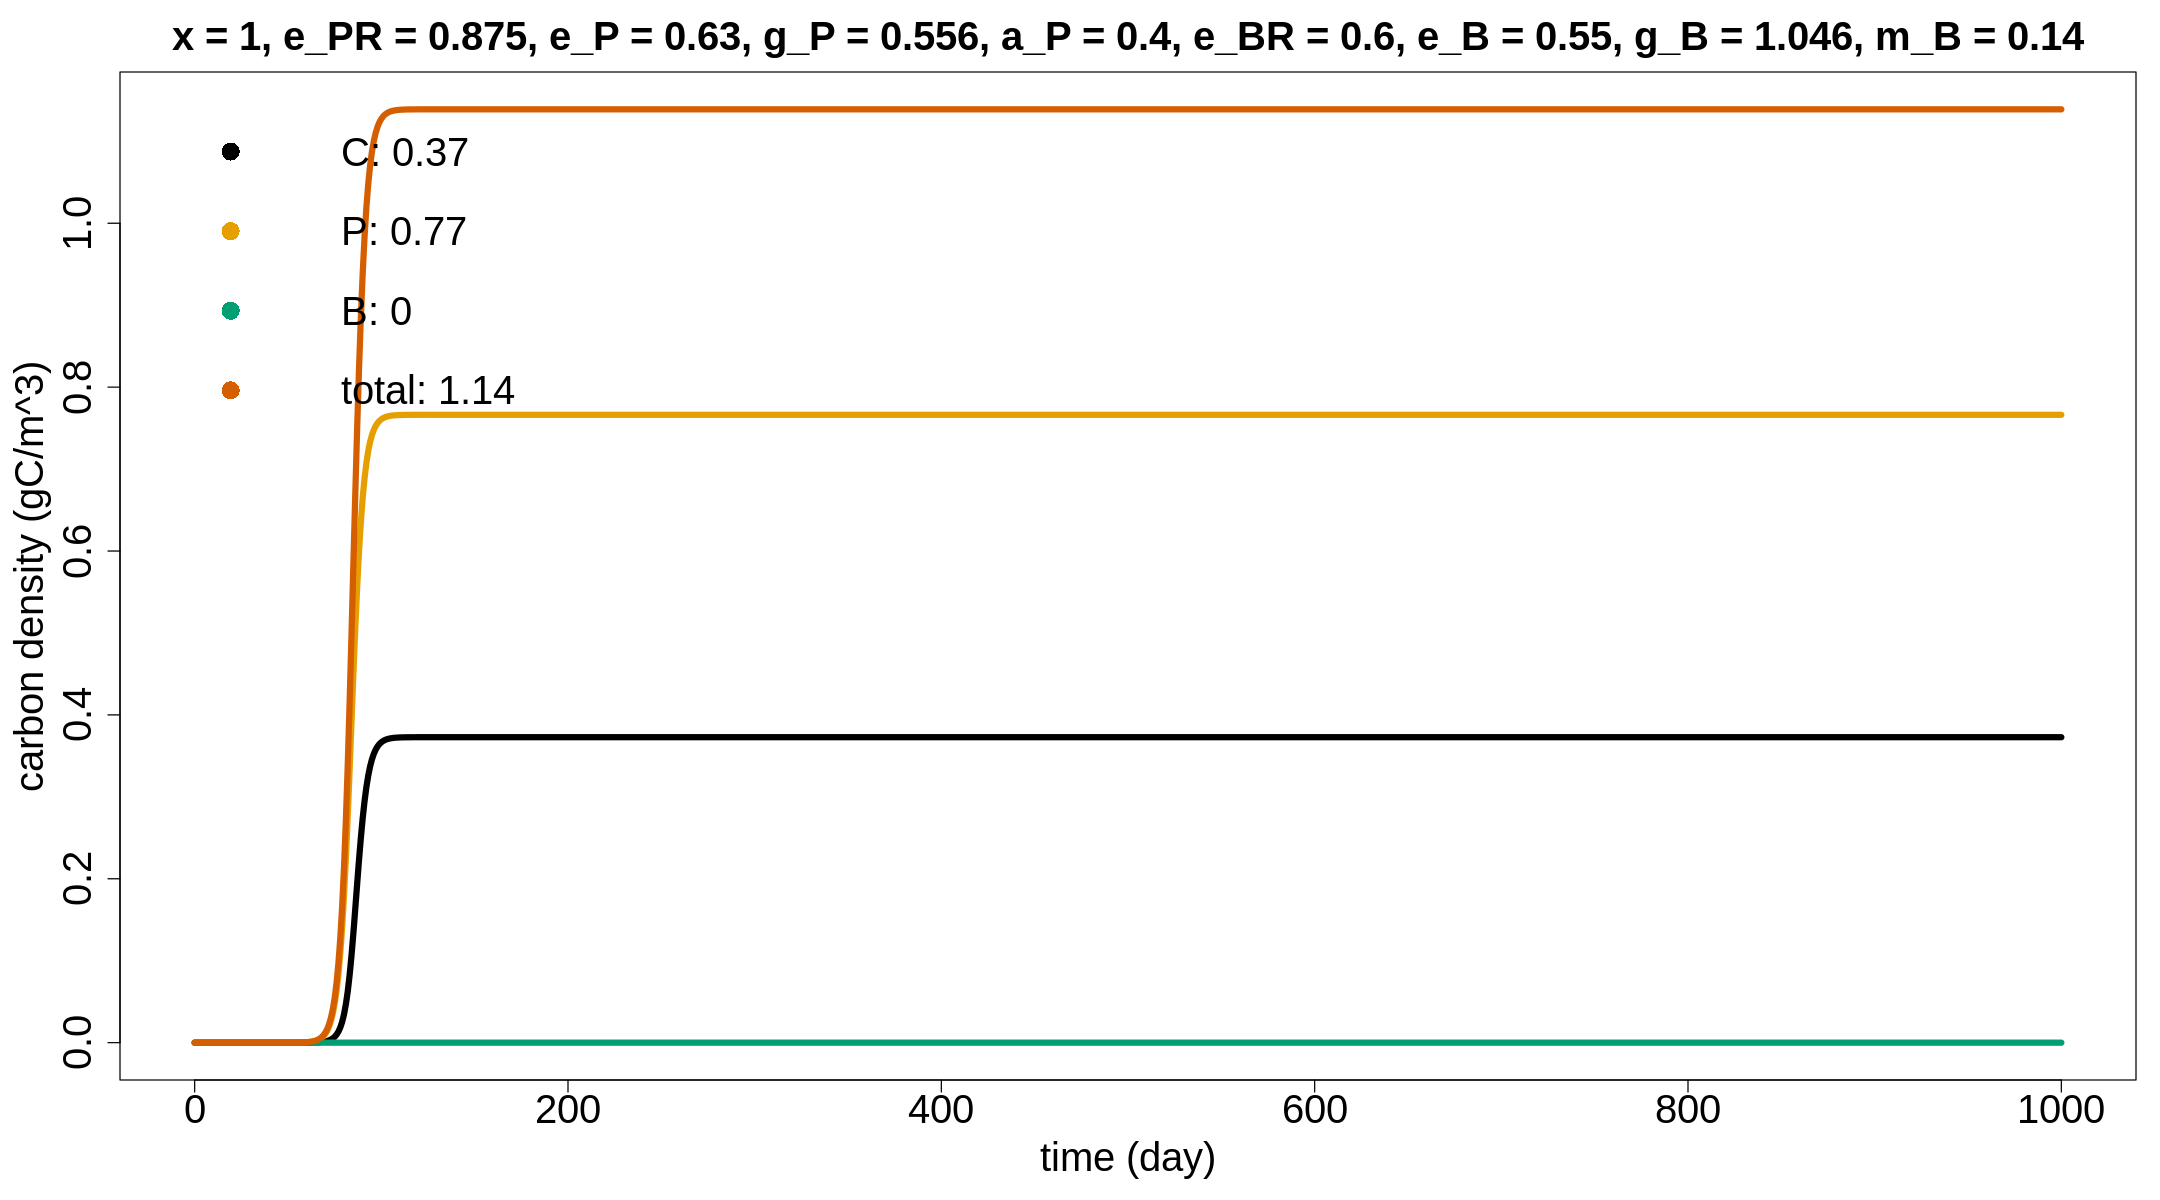

In [22]:
ebcDefault("h","h","h","l")

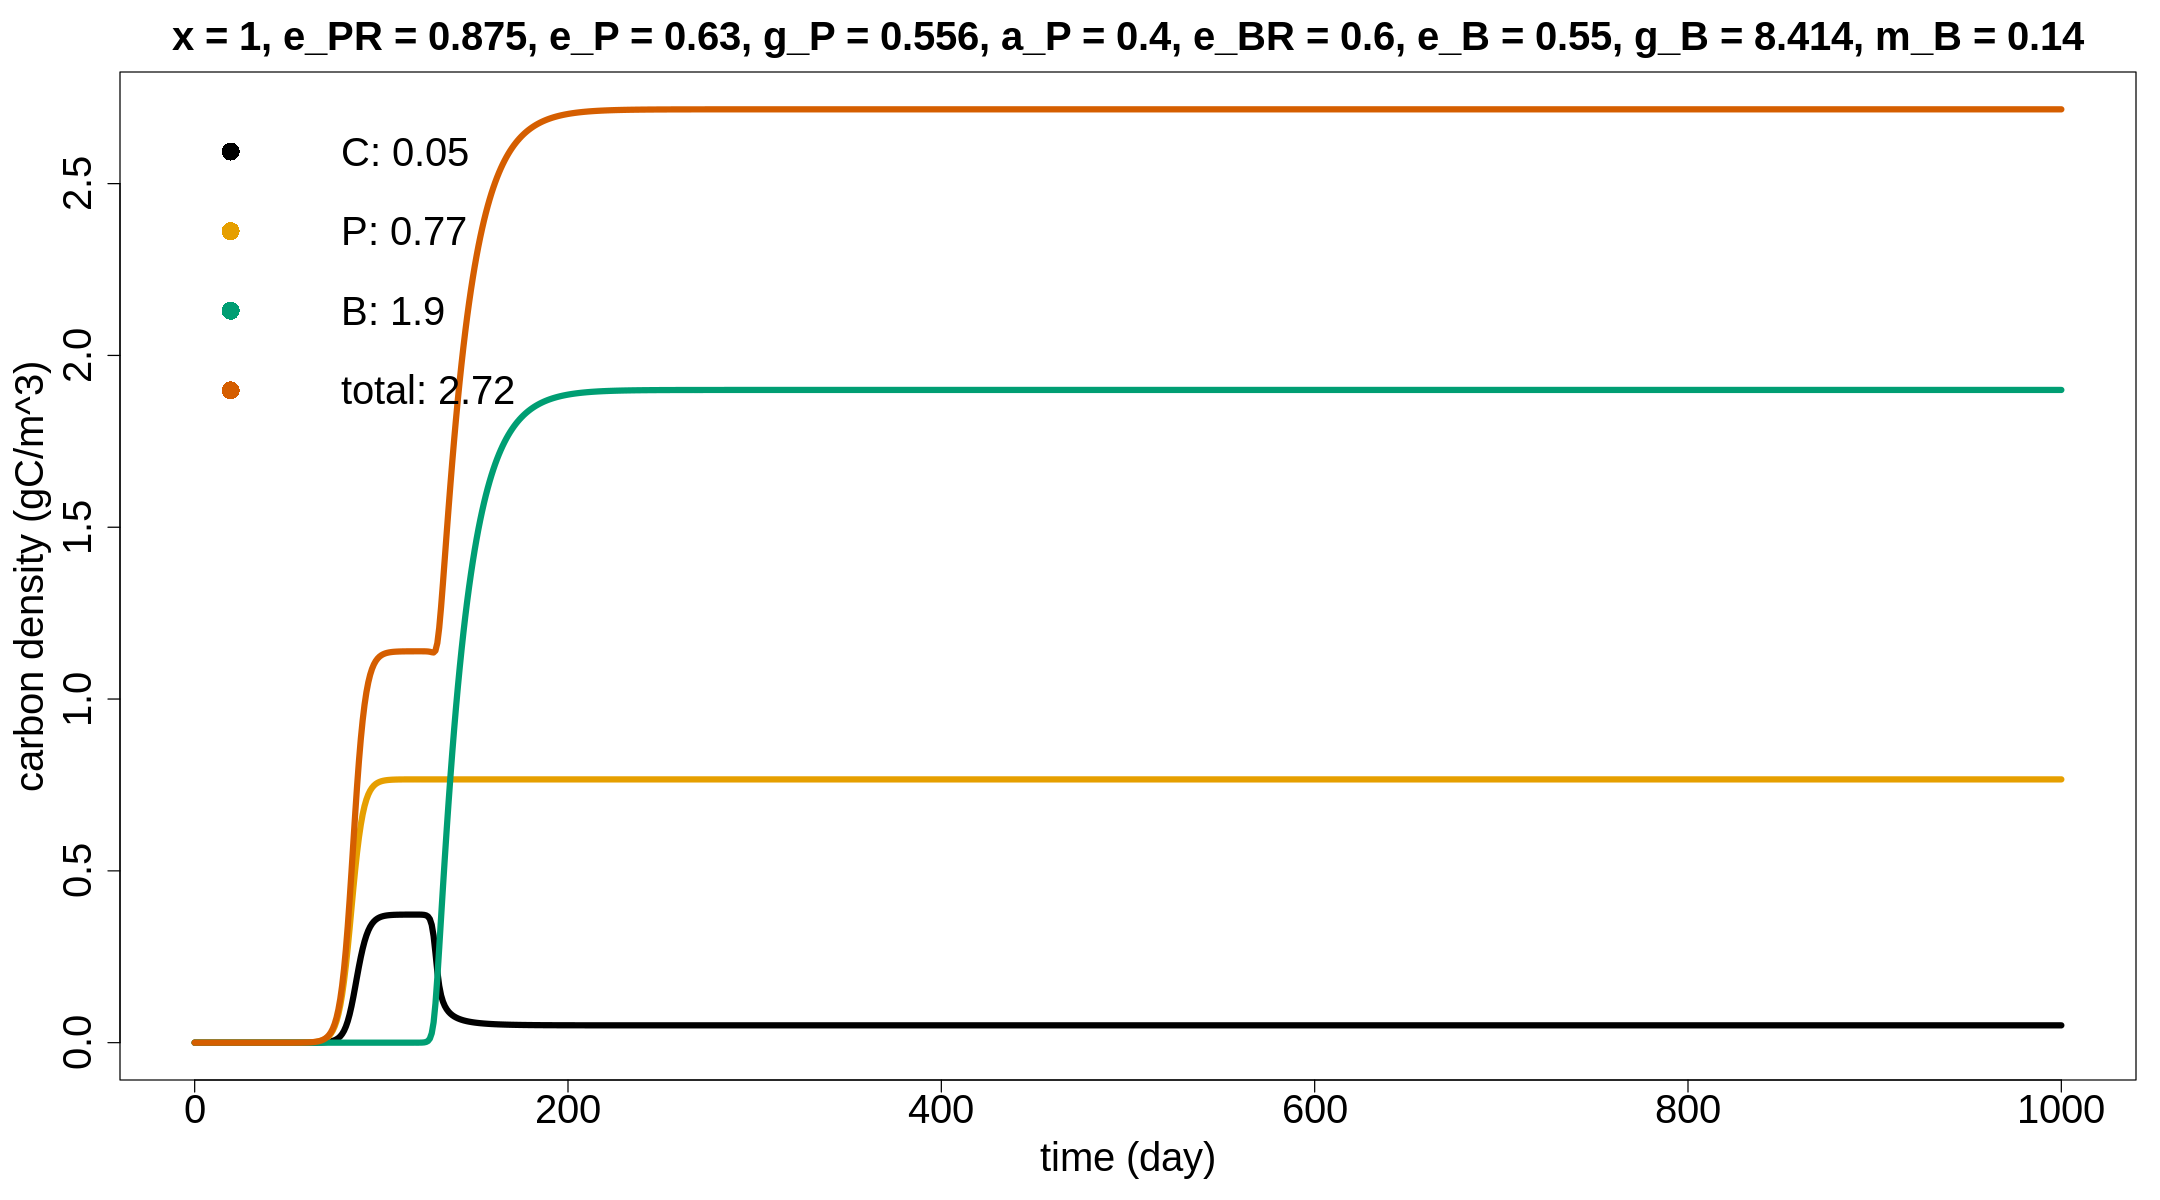

In [23]:
ebcDefault("h","h","h","h")

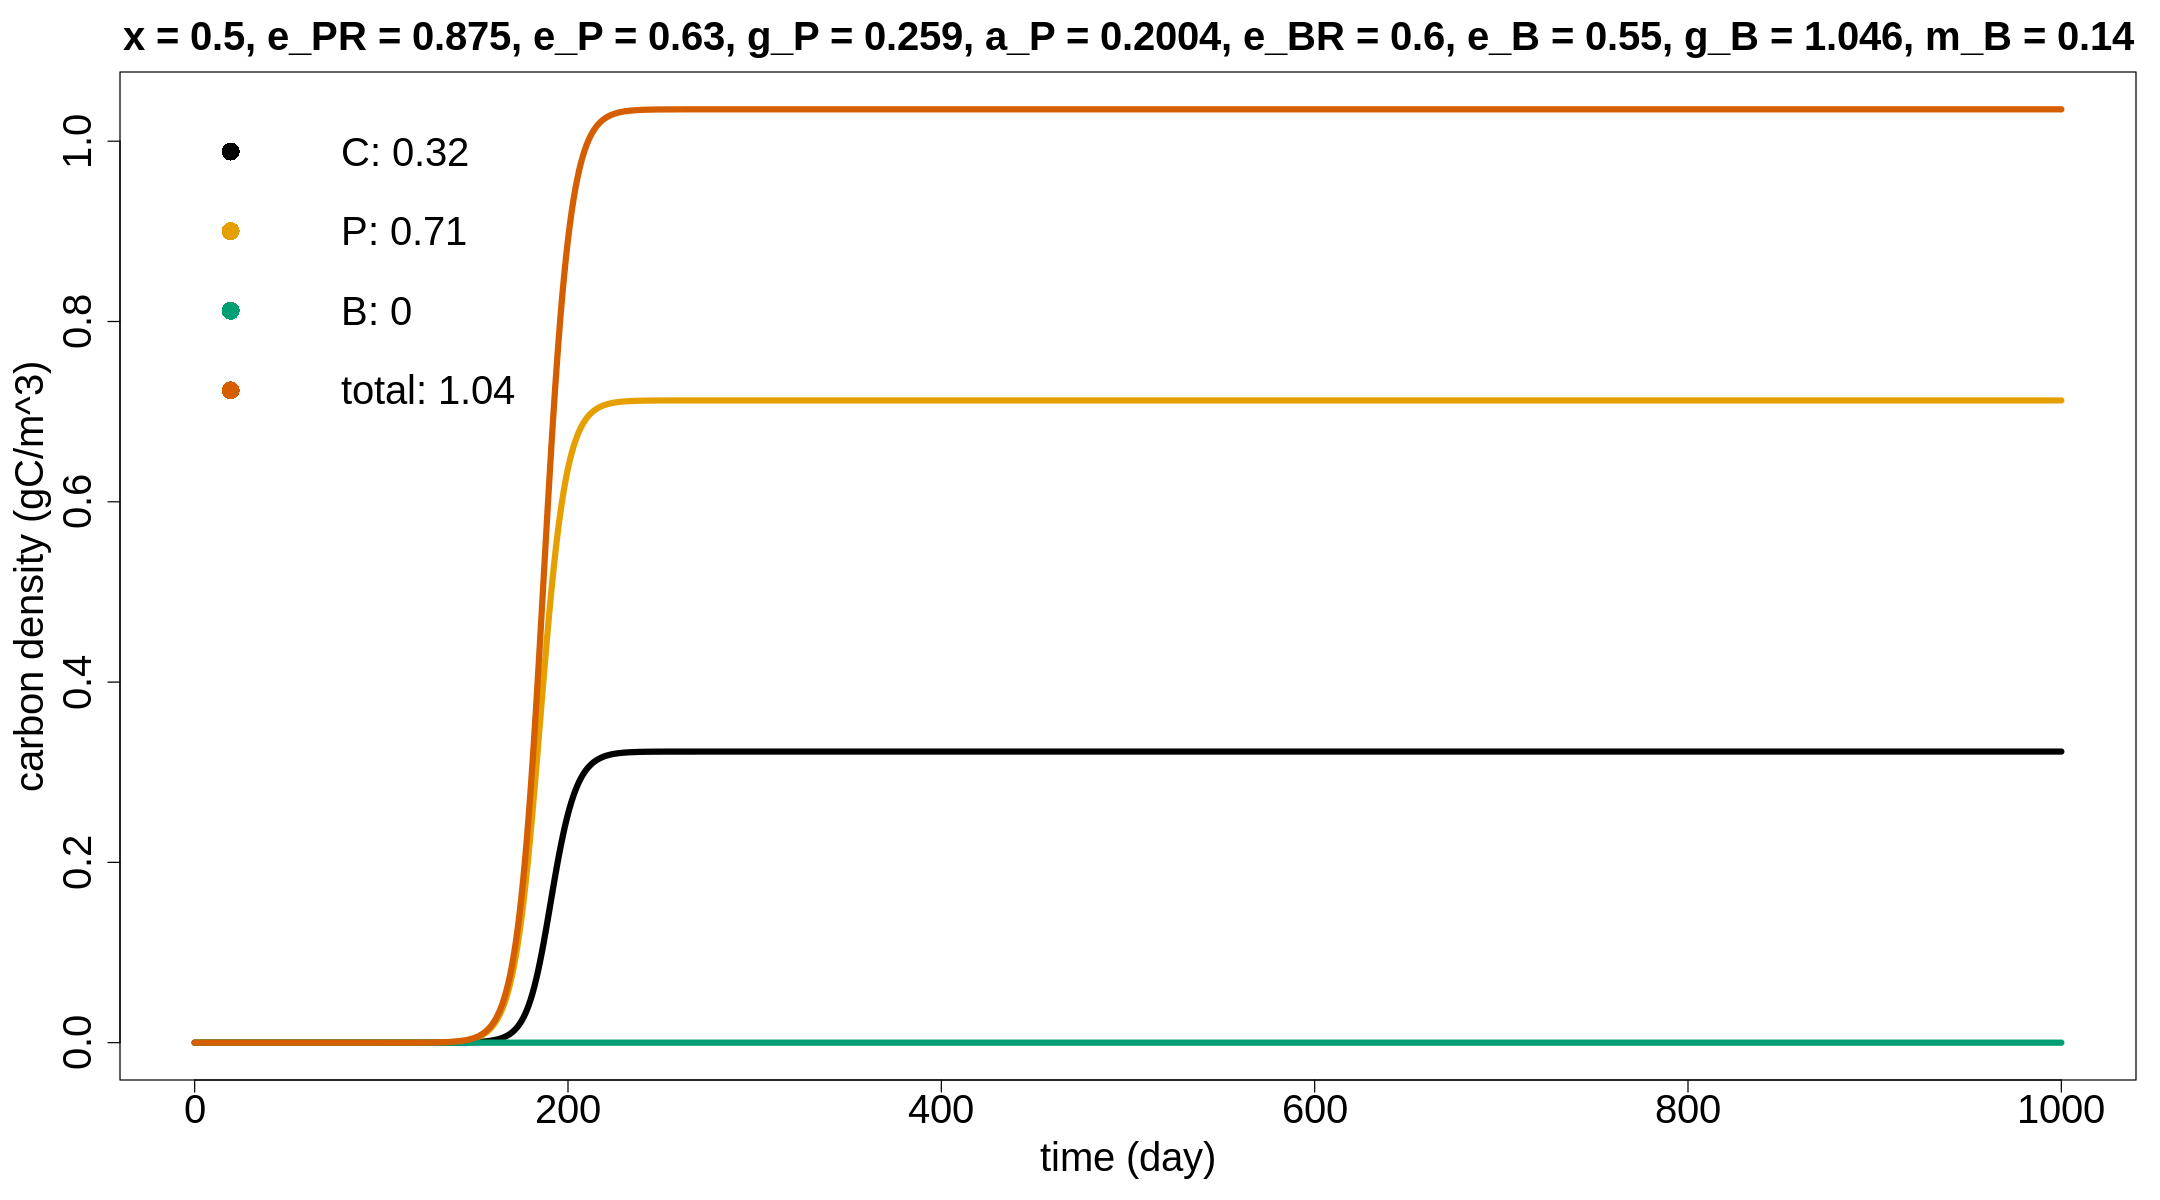

In [24]:
ebcDefault("m","m","l","l")

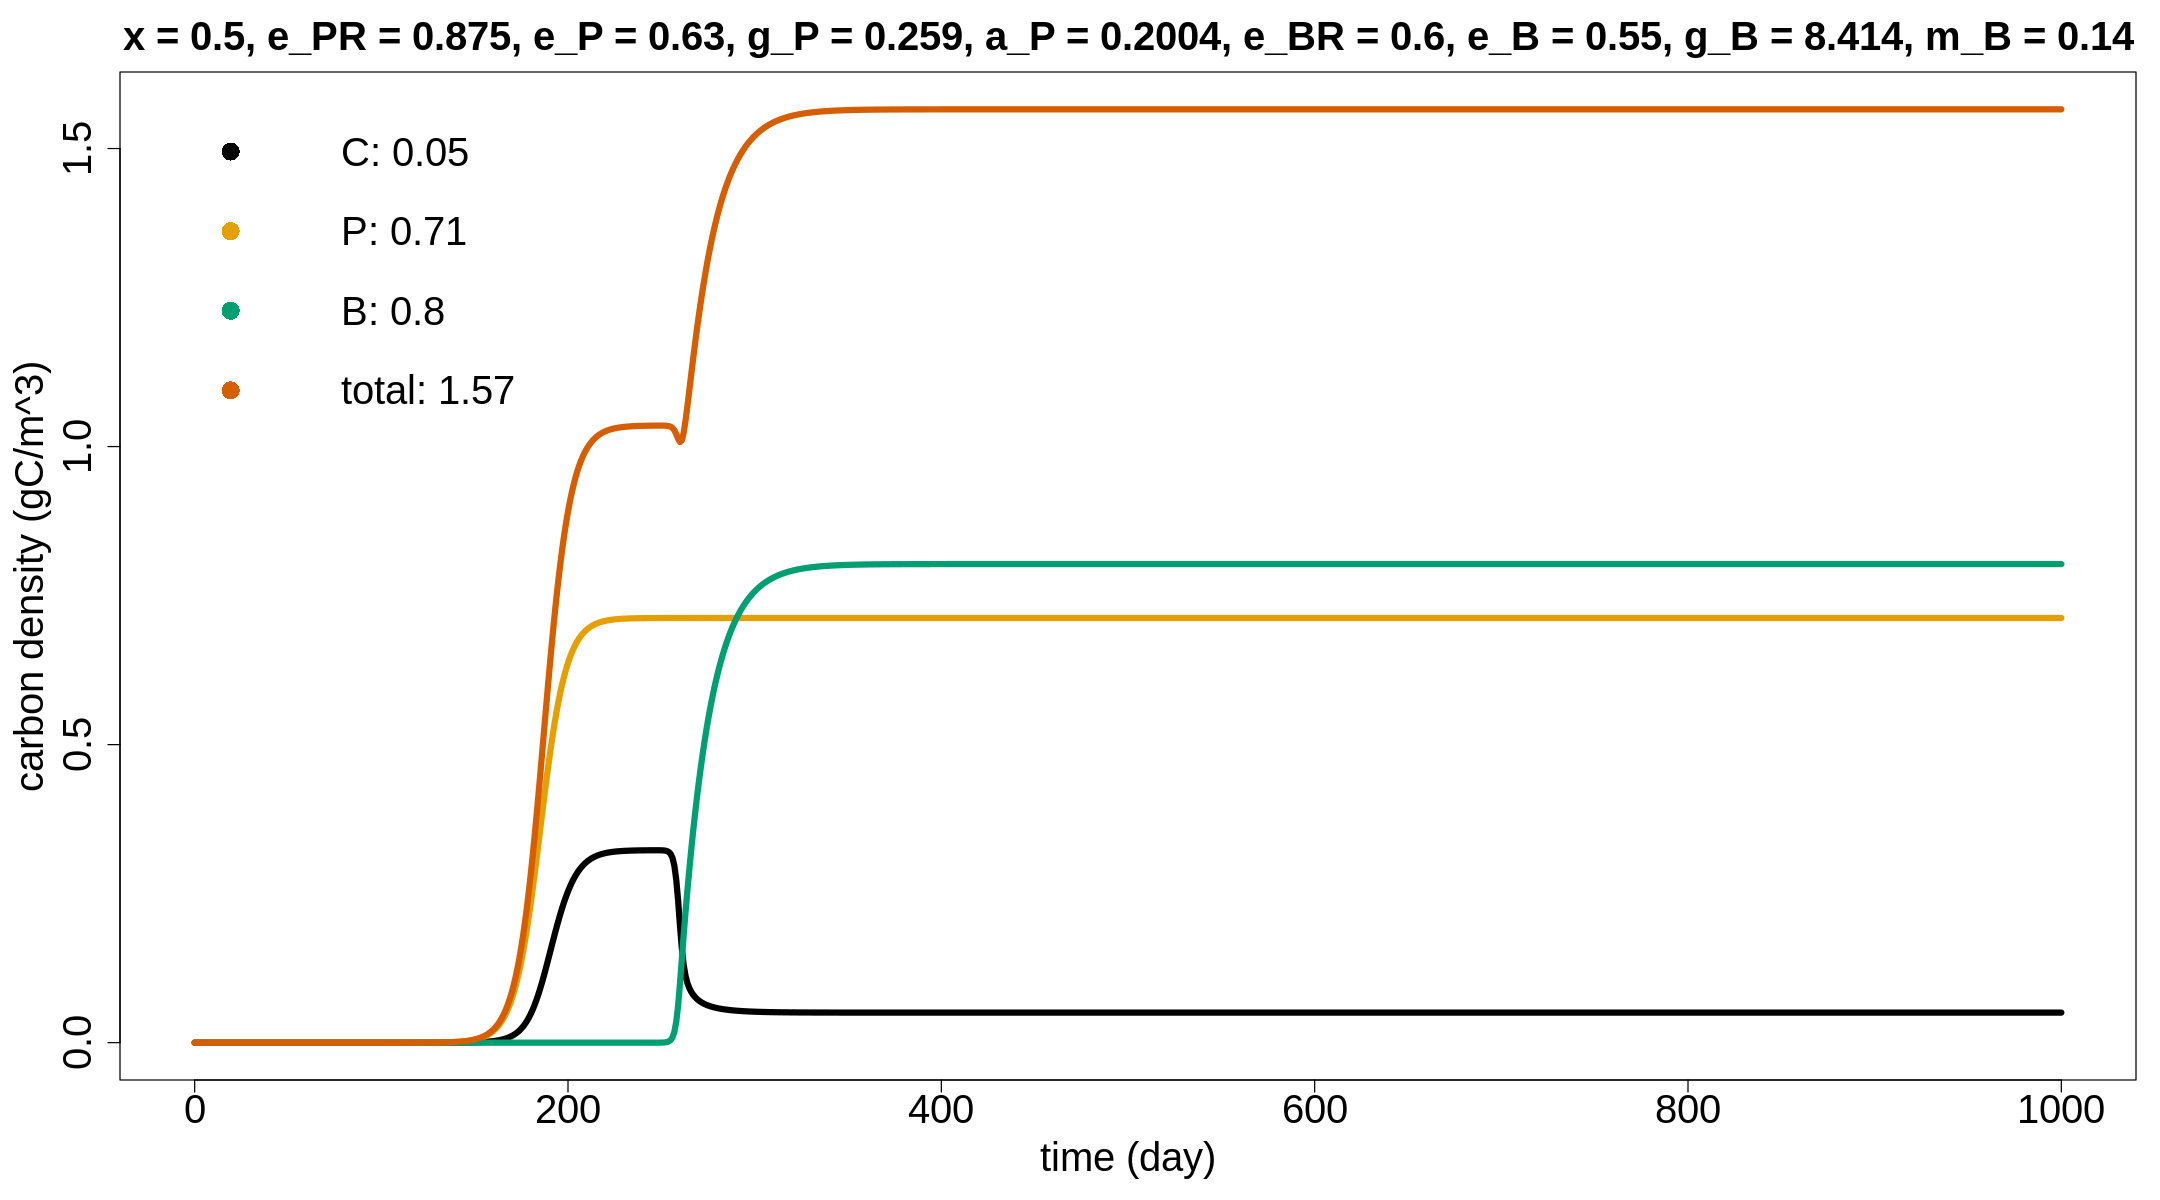

In [25]:
ebcDefault("m","m","l","h")

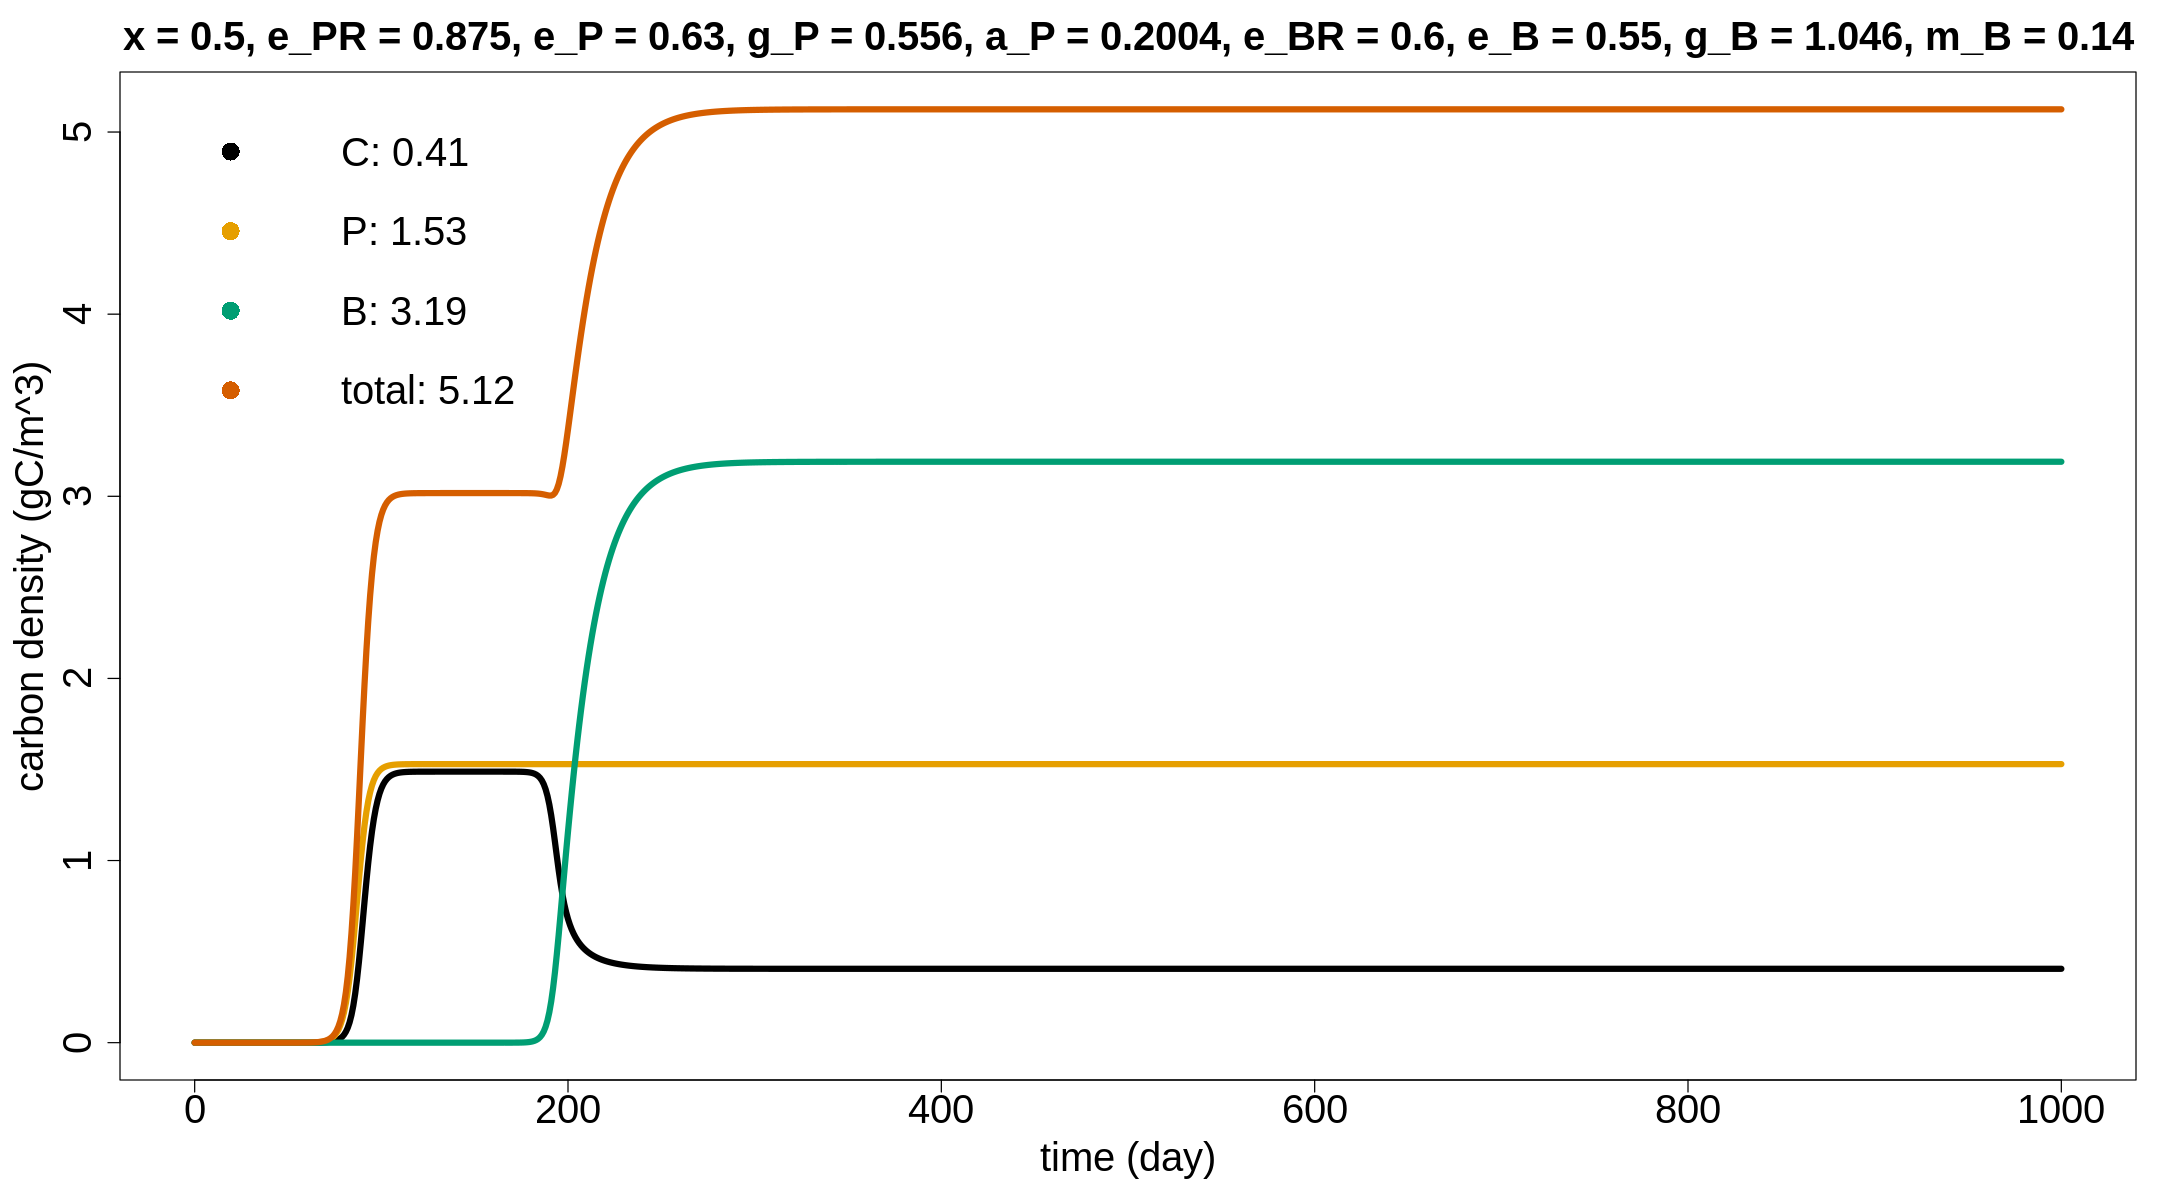

In [26]:
ebcDefault("m","m","h","l")

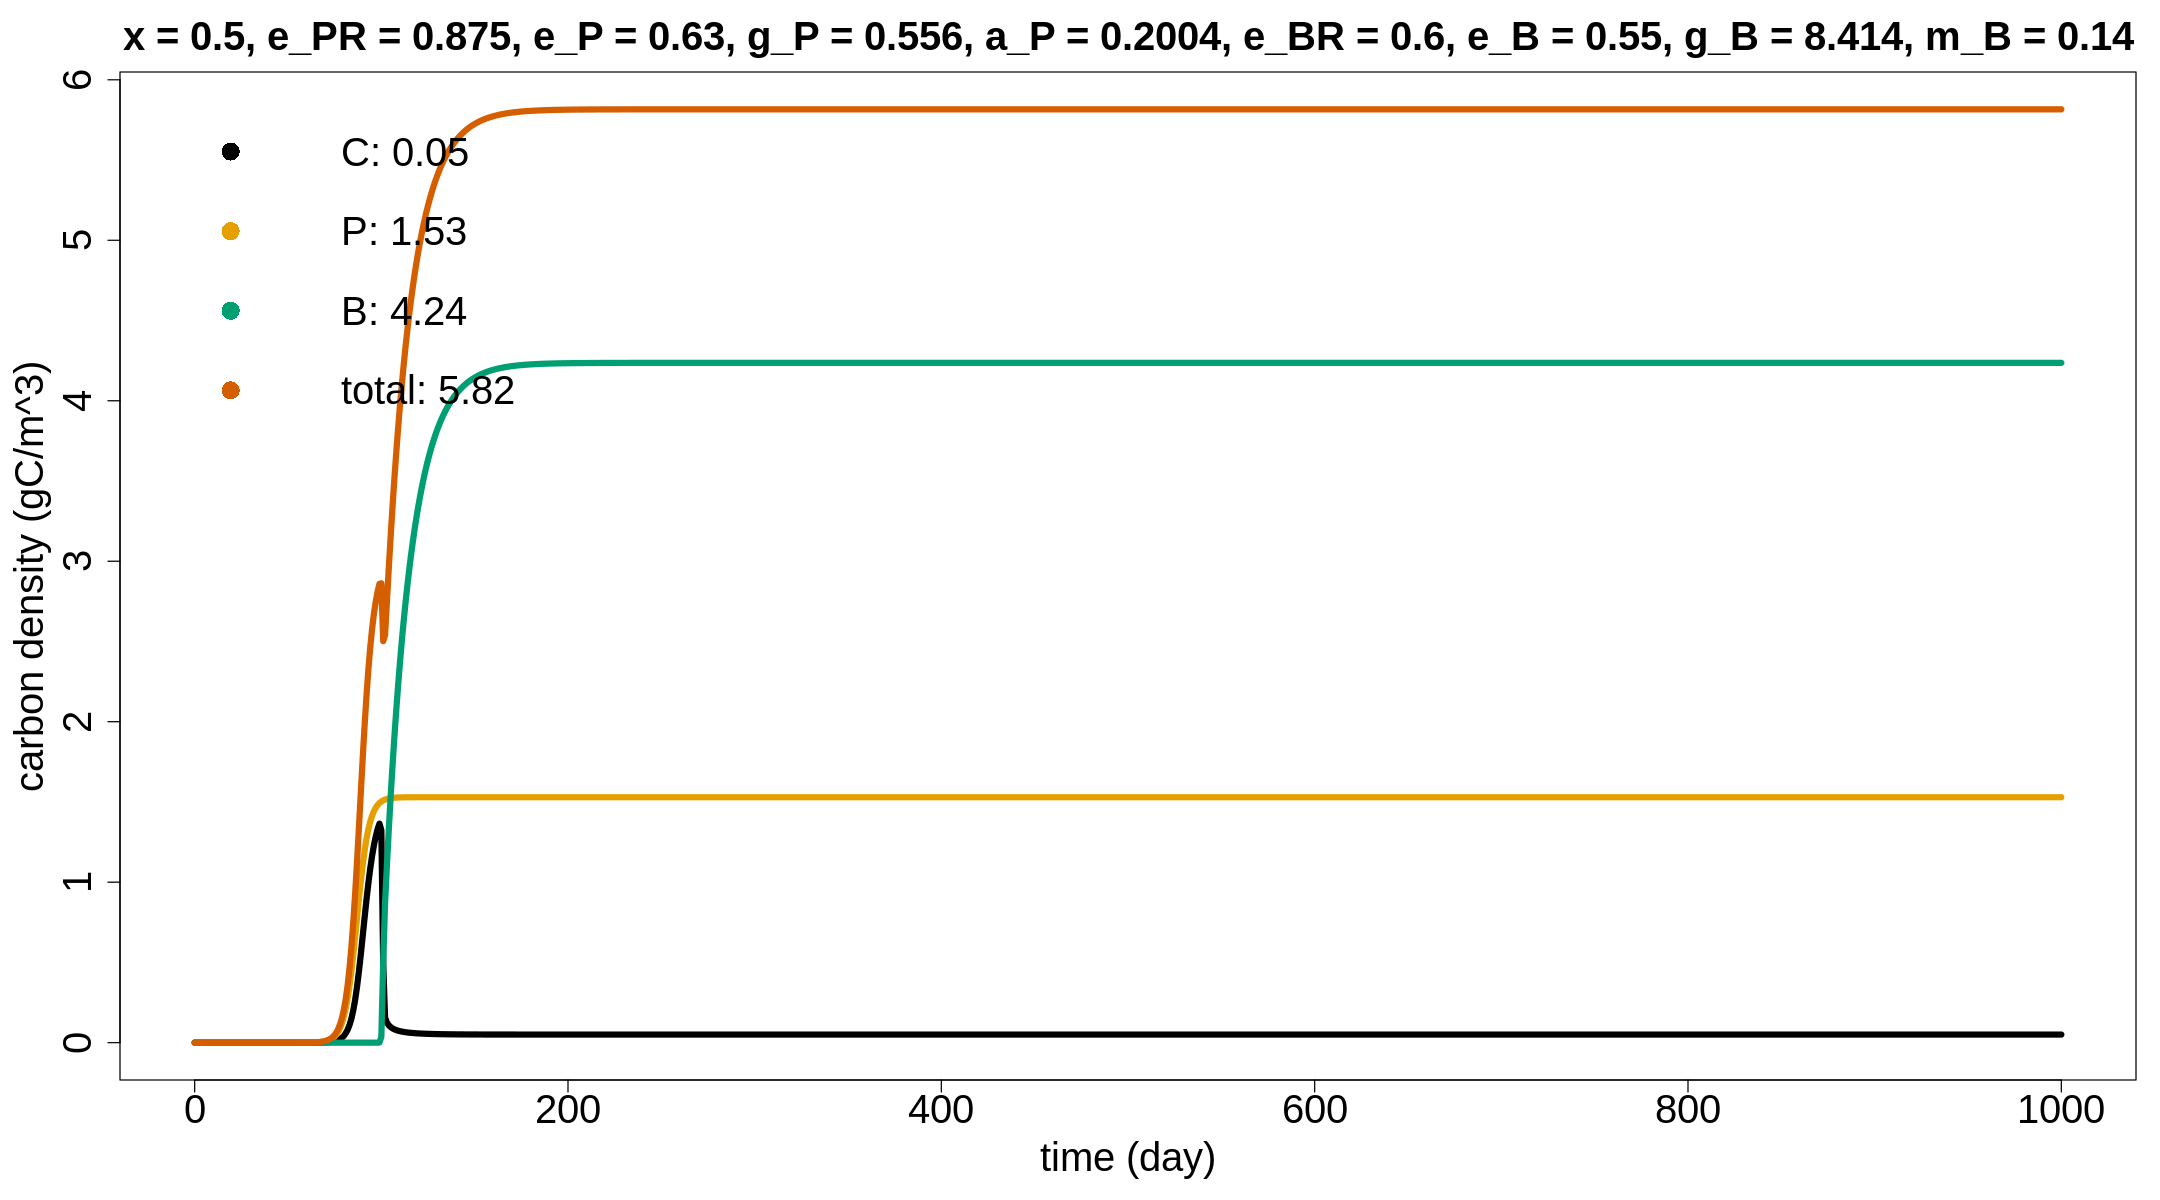

In [27]:
ebcDefault("m","m","h","h")